Brayden Hilton - Galvanize DAI #10 EDA Miderm Project

Load Libraries

In [931]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import math as mtah
# import plotly as plotly
# import plotly.express as px

In [932]:
#Load Dataset
# Source: https://www.kaggle.com/datasets/chakilamvishwas/imports-exports-15000
trade_df = pd.read_csv('C:/Users/Brayden Hilton/Desktop/Galvanize/Midterm Project/Imports_Exports_Dataset.csv')

Initial EDA curiosity questions
Trends among shipping methods and category
correlation between whether something is import/export and  corresponding shipping method 
Which ports are the most active
Is there a time of year where imports or exports 
Are certain categories imported/exported in certain times of year

Initial Data Overview. Returning different aspects of the data table prior to data cleaning. 

In [933]:
trade_df.head()


,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,describe,Export,1979,9506.57,07-12-2023,Machinery,Robertbury,620537,4248.65,Air,"Garrison, Hubbard and Hendricks",Seth Hall,21000294,Cash on Delivery
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,president,Export,5763,7100.91,04-04-2023,Clothing,Shahport,927600,4340.81,Air,Webb-Mack,Kimberly Ryan,88738432,Prepaid
2,eb1167b3-67a9-4378-bc65-c1e582e2e662,Turkey,far,Import,5740,2450.34,21-08-2024,Electronics,South Joshuatown,299258,4538.41,Air,"Mendez, Jones and Johnson",Ryan Silva,89922099,Prepaid
3,f7c1bd87-4da5-4709-9471-3d60c8a70639,Christmas Island,agency,Export,2592,7226.42,09-05-2022,Furniture,Adamfort,996084,4886.14,Air,Schroeder-Smith,Jacob Gray,63216265,Net 60
4,e443df78-9558-467f-9ba9-1faf7a024204,Finland,policy,Export,2622,2817.29,03-04-2023,Electronics,Juliebury,555981,4406.74,Air,Zimmerman LLC,Amy Stephens,94600248,Cash on Delivery


In [934]:
trade_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   15000 non-null  object 
 1   Country          15000 non-null  object 
 2   Product          15000 non-null  object 
 3   Import_Export    15000 non-null  object 
 4   Quantity         15000 non-null  int64  
 5   Value            15000 non-null  float64
 6   Date             15000 non-null  object 
 7   Category         15000 non-null  object 
 8   Port             15000 non-null  object 
 9   Customs_Code     15000 non-null  int64  
 10  Weight           15000 non-null  float64
 11  Shipping_Method  15000 non-null  object 
 12  Supplier         15000 non-null  object 
 13  Customer         15000 non-null  object 
 14  Invoice_Number   15000 non-null  int64  
 15  Payment_Terms    15000 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 1.8+ MB


In [935]:
trade_df.describe()

,Quantity,Value,Customs_Code,Weight,Invoice_Number
count,15000.000000,15000.000000,15000.00000,15000.000000,1.500000e+04
mean,4980.554733,5032.931120,549507.95920,2492.118859,5.020677e+07
std,2866.166690,2857.593897,260886.91886,1451.378507,2.889888e+07
min,1.000000,102.120000,100041.00000,0.570000,4.202600e+04
25%,2517.000000,2552.750000,325635.50000,1243.482500,2.527742e+07
50%,4958.500000,5045.705000,545432.00000,2476.135000,5.026745e+07
75%,7458.250000,7504.700000,777988.00000,3747.392500,7.510045e+07
max,10000.000000,9999.130000,999964.00000,4999.930000,9.999799e+07


In [936]:
trade_df.sample(5)

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
9890,e46a5e4f-7fd2-4490-9adb-b925a004d6a9,Mauritania,possible,Import,3584,5282.41,24-01-2021,Clothing,Anthonyville,543687,3855.79,Sea,Morales LLC,Brian Smith,39162763,Cash on Delivery
14785,3e509980-585c-43df-992b-4df4df3c09c0,Cameroon,prevent,Import,5570,3640.15,11-02-2021,Furniture,East Jillstad,124746,4820.94,Land,Chan LLC,Ms. Kaitlyn Pineda,24472822,Prepaid
11898,ba6dc36b-597c-4c31-bd14-6cc63025e710,Haiti,central,Export,6631,4825.28,27-10-2019,Toys,Williamsberg,290913,4614.24,Land,Jones-Bush,Justin Potter,2714264,Net 30
14869,562cbf9b-496d-471d-ba19-2cc2f3e8d871,Latvia,happen,Export,913,5451.20,24-02-2022,Machinery,Michaelview,626489,4795.66,Sea,"Burke, Coleman and Reynolds",Taylor House,48113699,Net 60
13877,af595118-fd06-433b-bb1f-7c3a61a49a7e,Morocco,economy,Export,6136,5998.52,21-01-2024,Furniture,Sarahville,926928,487.23,Air,French and Sons,Erik Pacheco,93856196,Net 60


In [937]:
trade_df.value_counts()

Transaction_ID                        Country                                              Product    Import_Export  Quantity  Value    Date        Category   Port              Customs_Code  Weight   Shipping_Method  Supplier                    Customer          Invoice_Number  Payment_Terms   
00073cc2-c801-467c-9039-fca63c78c6a9  Gabon                                                threat     Export         2434      9753.17  30-09-2023  Toys       Davisbury         194680        4111.53  Land             Miller LLC                  Brandon Peterson  32236195        Prepaid             1
abb4147d-8968-4093-bf02-0a5079cc9a8b  Bangladesh                                           practice   Import         9451      7541.68  12-04-2022  Machinery  East Amychester   403384        1132.41  Sea              Johnson, Black and Howard   Michael Norris    69060577        Prepaid             1
ab6fc9e7-be72-4448-91b5-ab77d09e1abb  Madagascar                                           sound      

In [938]:
#Dropping the Product column because it does not contain real values that pertain to a product description that can be used for analysis. 
trade_df = trade_df.drop(columns =['Product'])
trade_df

,Transaction_ID,Country,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,Export,1979,9506.57,07-12-2023,Machinery,Robertbury,620537,4248.65,Air,"Garrison, Hubbard and Hendricks",Seth Hall,21000294,Cash on Delivery
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,Export,5763,7100.91,04-04-2023,Clothing,Shahport,927600,4340.81,Air,Webb-Mack,Kimberly Ryan,88738432,Prepaid
2,eb1167b3-67a9-4378-bc65-c1e582e2e662,Turkey,Import,5740,2450.34,21-08-2024,Electronics,South Joshuatown,299258,4538.41,Air,"Mendez, Jones and Johnson",Ryan Silva,89922099,Prepaid
3,f7c1bd87-4da5-4709-9471-3d60c8a70639,Christmas Island,Export,2592,7226.42,09-05-2022,Furniture,Adamfort,996084,4886.14,Air,Schroeder-Smith,Jacob Gray,63216265,Net 60
4,e443df78-9558-467f-9ba9-1faf7a024204,Finland,Export,2622,2817.29,03-04-2023,Electronics,Juliebury,555981,4406.74,Air,Zimmerman LLC,Amy Stephens,94600248,Cash on Delivery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,48df15a8-0823-4964-8c16-eddf2756f382,Marshall Islands,Export,2860,2055.19,09-07-2024,Furniture,South Karenfort,393463,4120.35,Land,Smith-Lewis,Darlene Davis,29605073,Net 60
14996,31106617-94a6-4646-a001-5e7bd45abc26,Bermuda,Export,2443,6407.06,18-06-2024,Furniture,Jeffreyside,484143,1832.71,Air,Jones Group,John Ramos,39044695,Cash on Delivery
14997,ee485839-fbde-4ced-af18-d98f5e863081,Tanzania,Export,1702,9918.29,30-04-2020,Toys,North Meganborough,354935,4203.52,Land,Barnes-Romero,Rebecca Phelps,78492040,Net 30
14998,5acd54aa-ec8c-4055-be8b-a447861a471c,Tuvalu,Export,8108,9288.57,29-04-2021,Clothing,Villafurt,234296,1597.72,Land,"Smith, Allison and Bennett",Scott Yates,20799602,Cash on Delivery


In [939]:
#Checking to see what the range of dates are in the dataset
earliest_date = trade_df['Date'].min()
latest_date = trade_df['Date'].max()
print(earliest_date)
print(latest_date)

01-01-2020
31-12-2023


In [940]:
#Checking the frequency of each unique date
frequency_of_dates = trade_df['Date'].value_counts()
frequency_of_dates

Date
17-06-2022    19
27-06-2021    18
03-08-2024    17
08-11-2021    17
28-09-2019    17
              ..
16-05-2022     2
25-12-2023     2
20-11-2022     1
28-02-2024     1
19-01-2022     1
Name: count, Length: 1827, dtype: int64

In [941]:
#Adjusting the DD-MM-YYYY format in the Date column 
trade_df['Date'] = pd.to_datetime(trade_df['Date'], dayfirst=True)
trade_df['Date']

0       2023-12-07
1       2023-04-04
2       2024-08-21
3       2022-05-09
4       2023-04-03
           ...    
14995   2024-07-09
14996   2024-06-18
14997   2020-04-30
14998   2021-04-29
14999   2019-12-25
Name: Date, Length: 15000, dtype: datetime64[ns]

In [942]:
#Checking for the frequency of each day of the week 
trade_df['DayofWeek'] = trade_df['Date'].dt.day_name() #creating new column 'DayofWeek' with the values being the respective day of the week 
day_of_week_counts = trade_df['DayofWeek'].value_counts() #generating a value counts
day_of_week_counts

DayofWeek
Saturday     2213
Thursday     2180
Friday       2177
Monday       2144
Sunday       2118
Wednesday    2102
Tuesday      2066
Name: count, dtype: int64

In [943]:
most_common_day = day_of_week_counts.idxmax() #returns the lavel of the highest value(day of week)
most_common_day

'Saturday'

In [944]:
most_common_day_count = day_of_week_counts.max()
most_common_day_count

2213

In [945]:
#Any correlation between payment_terms and day of week?

In [946]:
trade_df['Transaction_ID'].value_counts()
#Each value is a distinct value. There are no duplicates. 

Transaction_ID
e3e70682-c209-4cac-a29f-6fbed82c07cd    1
d7189df6-09ff-4e33-b3ae-116821c5e4f2    1
efa8d0e2-0cab-462a-9705-a93bcc443566    1
5ca27785-89f7-490b-a7f3-05c1b401c956    1
20c8a438-df8a-4c3f-af84-14d7f715bc74    1
                                       ..
359b05fa-3ed3-4fbf-a8cc-e369339bace8    1
a2627f4d-1b32-4b5c-91bd-3fdfc4cd7d57    1
9c186760-34c9-43f5-9565-2825761fa15a    1
a22e53c0-8f70-4e40-b5c8-e6889c976417    1
5cc039d0-a052-41fd-bfbb-c9f60c4565ac    1
Name: count, Length: 15000, dtype: int64

In [947]:
trade_df['Country'].value_counts()

Country
Congo               133
Korea               113
Pakistan             79
Pitcairn Islands     79
Israel               79
                   ... 
Micronesia           45
Reunion              44
Liechtenstein        44
Faroe Islands        43
Palau                41
Name: count, Length: 243, dtype: int64

In [948]:
trade_df['Import_Export'].value_counts()
#Roughly split between exports and imports

Import_Export
Import    7569
Export    7431
Name: count, dtype: int64

In [949]:
trade_df['Port'].value_counts()

Port
West Michael       20
Lake Michael       20
Port David         17
New Michael        14
South Michael      14
                   ..
Port Laurashire     1
Underwoodfort       1
New Josephville     1
Lake Kaylabury      1
Villafurt           1
Name: count, Length: 10657, dtype: int64

In [950]:
trade_df['Customs_Code'].value_counts()

Customs_Code
906710    2
601144    2
373203    2
349924    2
451792    2
         ..
505063    1
393014    1
333634    1
691316    1
766709    1
Name: count, Length: 14881, dtype: int64

In [951]:
trade_df['Invoice_Number'].value_counts()

Invoice_Number
21000294    1
85646137    1
76873440    1
87309828    1
43996631    1
           ..
12992826    1
32915848    1
84224853    1
22657772    1
79237293    1
Name: count, Length: 15000, dtype: int64

In [952]:
trade_df['Shipping_Method'].value_counts()

Shipping_Method
Sea     5054
Air     4995
Land    4951
Name: count, dtype: int64

In [953]:
trade_df['Supplier'].value_counts()

Supplier
Johnson PLC                   21
Smith Inc                     20
Johnson Group                 18
Johnson Inc                   17
Williams LLC                  17
                              ..
Ferguson-Edwards               1
Lowe Group                     1
Johnson, Jones and Chang       1
Greene, Arellano and Brown     1
Fleming-Miles                  1
Name: count, Length: 12581, dtype: int64

In [954]:
trade_df['Customer'].value_counts()

Customer
Michael Miller         8
Jennifer Smith         7
James Wilson           7
Robert Brown           6
Christopher Johnson    6
                      ..
Joseph Lindsey         1
Hayley Cook            1
Kelly Montoya          1
Dale Jenkins           1
Steven Young           1
Name: count, Length: 13753, dtype: int64

In [955]:
trade_df['Category'].value_counts()

Category
Clothing       3048
Furniture      3024
Electronics    3021
Machinery      3010
Toys           2897
Name: count, dtype: int64

In [956]:
trade_df['Value'].value_counts()

Value
8261.84    2
5592.90    2
6459.24    2
1979.30    2
2418.49    2
          ..
6658.87    1
1164.39    1
2521.47    1
6742.71    1
561.33     1
Name: count, Length: 14884, dtype: int64

In [957]:
trade_df['Value'].mean()

5032.931120000001

In [958]:
trade_df['Payment_Terms'].value_counts()

Payment_Terms
Cash on Delivery    3831
Net 60              3758
Prepaid             3754
Net 30              3657
Name: count, dtype: int64

In [959]:
trade_df

,Transaction_ID,Country,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms,DayofWeek
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,Export,1979,9506.57,2023-12-07,Machinery,Robertbury,620537,4248.65,Air,"Garrison, Hubbard and Hendricks",Seth Hall,21000294,Cash on Delivery,Thursday
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,Export,5763,7100.91,2023-04-04,Clothing,Shahport,927600,4340.81,Air,Webb-Mack,Kimberly Ryan,88738432,Prepaid,Tuesday
2,eb1167b3-67a9-4378-bc65-c1e582e2e662,Turkey,Import,5740,2450.34,2024-08-21,Electronics,South Joshuatown,299258,4538.41,Air,"Mendez, Jones and Johnson",Ryan Silva,89922099,Prepaid,Wednesday
3,f7c1bd87-4da5-4709-9471-3d60c8a70639,Christmas Island,Export,2592,7226.42,2022-05-09,Furniture,Adamfort,996084,4886.14,Air,Schroeder-Smith,Jacob Gray,63216265,Net 60,Monday
4,e443df78-9558-467f-9ba9-1faf7a024204,Finland,Export,2622,2817.29,2023-04-03,Electronics,Juliebury,555981,4406.74,Air,Zimmerman LLC,Amy Stephens,94600248,Cash on Delivery,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,48df15a8-0823-4964-8c16-eddf2756f382,Marshall Islands,Export,2860,2055.19,2024-07-09,Furniture,South Karenfort,393463,4120.35,Land,Smith-Lewis,Darlene Davis,29605073,Net 60,Tuesday
14996,31106617-94a6-4646-a001-5e7bd45abc26,Bermuda,Export,2443,6407.06,2024-06-18,Furniture,Jeffreyside,484143,1832.71,Air,Jones Group,John Ramos,39044695,Cash on Delivery,Tuesday
14997,ee485839-fbde-4ced-af18-d98f5e863081,Tanzania,Export,1702,9918.29,2020-04-30,Toys,North Meganborough,354935,4203.52,Land,Barnes-Romero,Rebecca Phelps,78492040,Net 30,Thursday
14998,5acd54aa-ec8c-4055-be8b-a447861a471c,Tuvalu,Export,8108,9288.57,2021-04-29,Clothing,Villafurt,234296,1597.72,Land,"Smith, Allison and Bennett",Scott Yates,20799602,Cash on Delivery,Thursday


In [960]:
#groupby country to see the preferred method of shipping method per country
trade_df.groupby('Country')['Shipping_Method'].value_counts()

Country      Shipping_Method
Afghanistan  Land               23
             Sea                20
             Air                13
Albania      Sea                28
             Land               20
                                ..
Zambia       Land               18
             Sea                17
Zimbabwe     Sea                20
             Air                16
             Land               15
Name: count, Length: 729, dtype: int64

In [961]:
#Grouping by Category of product and sorting to see if there is a certain time of year that a category is imported/exported more frequently
trade_df.groupby('Category')['Date'].value_counts()


Category  Date      
Clothing  2023-02-10    9
          2019-10-10    6
          2019-12-24    6
          2021-08-30    6
          2021-10-21    6
                       ..
Toys      2024-08-27    1
          2024-08-30    1
          2024-09-01    1
          2024-09-03    1
          2024-09-05    1
Name: count, Length: 7360, dtype: int64

In [962]:
#Similar to the previous line of code but checking to see about the day of the week instead of date
trade_df.groupby('Category')['DayofWeek'].value_counts()

Category     DayofWeek
Clothing     Saturday     476
             Friday       455
             Sunday       445
             Monday       425
             Tuesday      425
             Wednesday    417
             Thursday     405
Electronics  Thursday     447
             Saturday     441
             Sunday       436
             Monday       425
             Tuesday      425
             Wednesday    424
             Friday       423
Furniture    Friday       453
             Wednesday    449
             Thursday     448
             Monday       447
             Tuesday      424
             Saturday     405
             Sunday       398
Machinery    Saturday     453
             Friday       451
             Wednesday    439
             Thursday     428
             Sunday       415
             Monday       412
             Tuesday      412
Toys         Thursday     452
             Saturday     438
             Monday       435
             Sunday       424
             Frid

In [963]:
#Grouping by the country and port
trade_df.groupby('Country')['Port'].value_counts()

Country      Port             
Afghanistan  Amyburgh             1
             Andreaport           1
             Armstrongberg        1
             Bairdchester         1
             Benjaminland         1
                                 ..
Zimbabwe     South Susanmouth     1
             West Brandiville     1
             West Daniellefurt    1
             West Troy            1
             Whiteborough         1
Name: count, Length: 14959, dtype: int64

In [964]:
#grouping by category and finding the value counts of the weight and a few of descriptive statistics
vc_category_weight_df = trade_df.groupby('Category')['Weight'].value_counts()
mean_category_weight_df = trade_df.groupby('Category')['Weight'].mean()
min_category_weight_df = trade_df.groupby('Category')['Weight'].min()
mean_category_weight_df
min_category_weight_df

Category
Clothing       0.57
Electronics    5.86
Furniture      2.86
Machinery      1.64
Toys           2.59
Name: Weight, dtype: float64

In [965]:
#grouping by category and value
trade_df.groupby('Category')['Value'].value_counts()

Category  Value  
Clothing  6832.92    2
          7009.52    2
          7495.61    2
          7978.60    2
          102.12     1
                    ..
Toys      9970.36    1
          9982.69    1
          9987.98    1
          9988.26    1
          9995.06    1
Name: count, Length: 14974, dtype: int64

In [966]:
#I want to compare the category of a product, how much it weighs, and what the price per lb is. I'd like to explore further if there is a price discrepency in whether something is an import or export and if there is a price discrepency between 

In [967]:
category_value_df = trade_df.groupby('Category')['Value'].mean()
category_value_df

Category
Clothing       5007.352123
Electronics    5161.383952
Furniture      5059.013211
Machinery      4974.067146
Toys           4959.826907
Name: Value, dtype: float64

In [968]:
category_by_avg_weight_df = trade_df.groupby('Category')['Weight'].mean()
category_by_avg_weight_df

Category
Clothing       2482.151791
Electronics    2484.886713
Furniture      2494.463800
Machinery      2521.933037
Toys           2476.722295
Name: Weight, dtype: float64

In [969]:
#On average, I want to see what the price per KG is for each category.
dollar_per_kg_category = category_by_avg_weight_df/category_value_df #if you want to konw how much weight you get per dollar spent
dollar_per_kg_category2 = category_value_df/category_by_avg_weight_df #if you want to know how much it costs per KG
dollar_per_kg_category2

Category
Clothing       2.017343
Electronics    2.077110
Furniture      2.028096
Machinery      1.972323
Toys           2.002577
dtype: float64

In [970]:
#I want to group by category and see the value count of payment terms to see if one category is financed differently than other categories
trade_df.groupby('Category')['Payment_Terms'].value_counts()

Category     Payment_Terms   
Clothing     Cash on Delivery    795
             Net 60              784
             Net 30              735
             Prepaid             734
Electronics  Prepaid             781
             Net 30              756
             Net 60              746
             Cash on Delivery    738
Furniture    Cash on Delivery    804
             Net 30              750
             Prepaid             741
             Net 60              729
Machinery    Cash on Delivery    778
             Net 60              759
             Prepaid             740
             Net 30              733
Toys         Prepaid             758
             Net 60              740
             Cash on Delivery    716
             Net 30              683
Name: count, dtype: int64

In [971]:
#I want to group by the supplier to see if there are suppliers that focus in a certain category
trade_df.groupby('Supplier')['Category'].value_counts()

Supplier                     Category   
Abbott LLC                   Clothing       1
Abbott and Sons              Machinery      1
Abbott, Olson and Allen      Machinery      1
Abbott, Taylor and Moreno    Machinery      1
Abbott-Oconnell              Toys           1
                                           ..
Zuniga and Sons              Machinery      1
Zuniga, King and Marquez     Electronics    1
Zuniga, Perez and Martin     Machinery      1
Zuniga, Schwartz and Butler  Machinery      1
Zuniga-Brown                 Machinery      1
Name: count, Length: 14075, dtype: int64

In [972]:
#I want to see if certain categories are imported or exported more than other categories
trade_df.groupby('Category')['Import_Export'].value_counts()

Category     Import_Export
Clothing     Import           1557
             Export           1491
Electronics  Export           1534
             Import           1487
Furniture    Import           1528
             Export           1496
Machinery    Import           1556
             Export           1454
Toys         Export           1456
             Import           1441
Name: count, dtype: int64

I want to create a graph that depicts the the three payment terms on the x axis and within each payment term there is a bin for the category. 
I want to show this graph following a scatter plot showing any correlation between a categories weight and its price per kg.

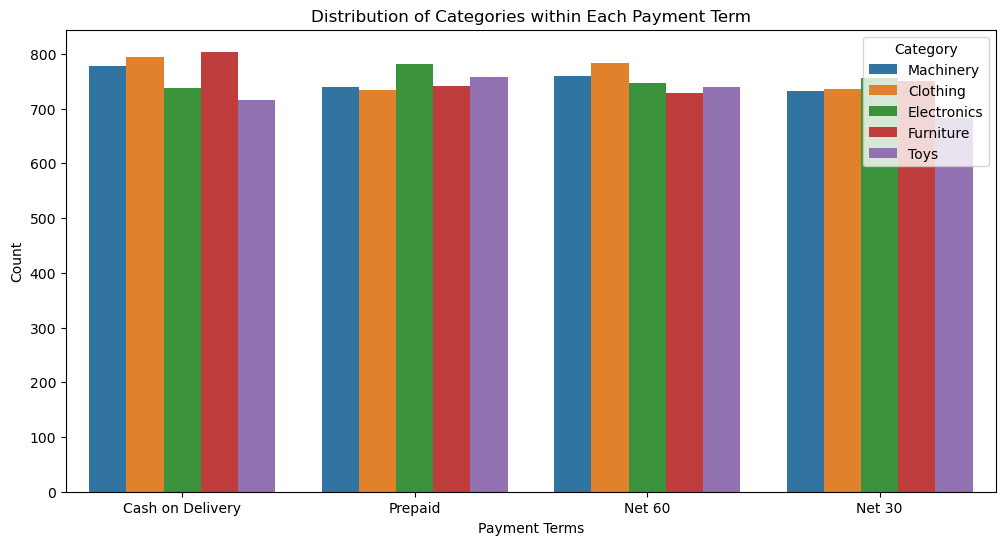

In [973]:
#I want to create a graph that depicts the the three payment terms on the x axis and within each payment term there is a bin for the category. 
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_Terms', hue='Category', data=trade_df)
plt.title('Distribution of Categories within Each Payment Term')
plt.xlabel('Payment Terms')
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()

I want to follow these two charts by comparing the mode of transportation and value.
I want to overlay the mode of transportation with category to see if there is a relationship between cost and shipping method by category.

In [974]:
#grouping by shipping method to see how many times a category uses a specific shipping method 
trade_df.groupby('Shipping_Method')['Category'].value_counts()

Shipping_Method  Category   
Air              Clothing       1040
                 Furniture      1024
                 Electronics     985
                 Machinery       978
                 Toys            968
Land             Machinery      1020
                 Toys            992
                 Clothing        986
                 Electronics     982
                 Furniture       971
Sea              Electronics    1054
                 Furniture      1029
                 Clothing       1022
                 Machinery      1012
                 Toys            937
Name: count, dtype: int64

In [975]:
#checking to see if day of week and va
trade_df.groupby('Category')['DayofWeek'].value_counts()

Category     DayofWeek
Clothing     Saturday     476
             Friday       455
             Sunday       445
             Monday       425
             Tuesday      425
             Wednesday    417
             Thursday     405
Electronics  Thursday     447
             Saturday     441
             Sunday       436
             Monday       425
             Tuesday      425
             Wednesday    424
             Friday       423
Furniture    Friday       453
             Wednesday    449
             Thursday     448
             Monday       447
             Tuesday      424
             Saturday     405
             Sunday       398
Machinery    Saturday     453
             Friday       451
             Wednesday    439
             Thursday     428
             Sunday       415
             Monday       412
             Tuesday      412
Toys         Thursday     452
             Saturday     438
             Monday       435
             Sunday       424
             Frid

In [976]:
#Checking to see if any ports 
trade_df.groupby('DayofWeek')['Port'].value_counts()

DayofWeek  Port        
Friday     Michaelmouth    6
           Johnmouth       4
           Lake Michael    4
           Michaelport     4
           New Jennifer    4
                          ..
Wednesday  Youngshire      1
           Youngton        1
           Zacharyland     1
           Zacharytown     1
           Zhangtown       1
Name: count, Length: 13902, dtype: int64

In [977]:
#Checking to see if certain ports import or export more than another 
trade_df.groupby('Import_Export')['Port'].value_counts()
#FOllow up question is, how to check where are they exporting to?

Import_Export  Port          
Export         Lake Michael      11
               West Michael      11
               New Michael       10
               East Jennifer      9
               East Michael       9
                                 ..
Import         Zacharyland        1
               Zacharystad        1
               Zhangborough       1
               Zimmermanmouth     1
               Zoeton             1
Name: count, Length: 12128, dtype: int64

In [978]:
#Compare top 5 ports from each category by
    #number of transactions
    #volume of imports/exports
    #quantity & weight
    #total value and value per transaction
#Contrast this with the bottom 5 ports 
#Also hope to see if there any connections to specific countries, suppliers, categories, or customers
    #such as a specific customer pays more for a certain category than another 
    #what is the variance between each port with the value and quantity?
#look at trends of price change, shipping method by CATEGORY over the data frames time period 

In [979]:
#do certain ports 
category_per_port = trade_df.groupby('Port').value_counts()
category_per_port
#I want to use this variable with the variable below to create a chart the category of 

Port            Transaction_ID                        Country                Import_Export  Quantity  Value    Date        Category     Customs_Code  Weight   Shipping_Method  Supplier                       Customer          Invoice_Number  Payment_Terms     DayofWeek
Aaronborough    1501a2e7-849b-495e-8d24-a4519358bf49  Tokelau                Export         9404      8766.61  2021-07-18  Furniture    742919        4265.53  Land             Chan and Sons                  Jonathan Johnson  73061388        Net 60            Sunday       1
                93097a3d-8fd2-47d8-b53f-3911f7a9b68e  Guernsey               Import         8622      4405.21  2024-01-26  Machinery    979884        3920.72  Air              Lee and Sons                   Stacey Gomez      61884982        Prepaid           Friday       1
Aaronfurt       1375497f-4426-45b9-ab9d-1c7cfa3d9391  Grenada                Import         2259      2448.81  2021-04-02  Toys         853270        82.08    Land             Smith, 

In [980]:
num_of_trans_per_port = trade_df.groupby('Port')['Transaction_ID'].count()
sorted_num_of_trans_per_port = num_of_trans_per_port.sort_values(ascending = False)
sorted_num_of_trans_per_port

Port
Lake Michael           20
West Michael           20
Port David             17
New Michael            14
South Michael          14
                       ..
Lake Kathrynborough     1
Lake Kathrynport        1
Lake Katieport          1
Lake Kaylaberg          1
Zoeton                  1
Name: Transaction_ID, Length: 10657, dtype: int64

In [981]:
avg_num_of_trans_per_port = num_of_trans_per_port.mean()
avg_num_of_trans_per_port

1.407525570047856

I would like to see by port, whether they import or export more and which category they import or export more. 

In [982]:
#Checking to see which ports have seen the most value of product to potentially overlay with whether they are importing or exporting
#to see whether there is a net gain/loss
sum_value_per_port = trade_df.groupby('Port')['Value'].sum().sort_values(ascending= False).head(20)
sum_value_per_port
#Can I use this to see if the top ports 

Port
West Michael         131006.93
Port David           107401.25
Lake Michael         102998.99
New Michael           79941.07
South Michael         72453.53
Michaelmouth          71700.60
Elizabethmouth        64619.65
North Christopher     64487.75
New Robert            64359.53
New James             62918.60
Lake Jessica          62840.70
New Jennifer          62498.68
East Michael          60675.64
Lake David            59814.10
South Robert          59560.59
Johnsonmouth          58882.25
Michaelland           58771.41
East John             56624.90
Lake Robert           56528.21
New John              56214.78
Name: Value, dtype: float64

In [983]:
avg_value_per_port = sum_value_per_port.mean()
avg_value_per_port

70714.95799999998

In [984]:
#use this as a reference to dive into specific columns
#top_5_ports = trade_df[trade_df['Port'].isin(["West Michael", "Port David"])]['Shipping_Method'].value_counts()
#create a new dataframe and set index to port 

<BarContainer object of 20 artists>

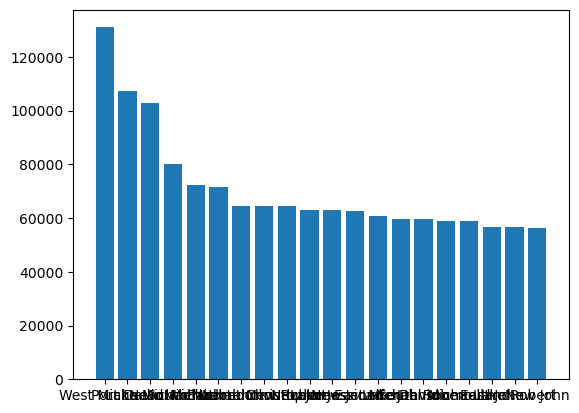

In [985]:
plt.bar(sum_value_per_port.index, sum_value_per_port)
#use an example after filtering for new data frame 

In [986]:
sum_value_per_port = trade_df.groupby('Port')['Value'].sum().sort_values(ascending= False).head(5)

In [987]:
#following up previous line of code to see if the ports value and weight have any correction. It is unclear whether this is importing or exporting
#meaning that this is generalized 
sum_weight_per_port = trade_df.groupby('Port')['Weight'].sum()
sum_weight_per_port

Port
Aaronborough       8186.25
Aaronfurt            82.08
Aaronland          4553.83
Aaronmouth        19550.11
Aaronport          1658.61
                    ...   
Zavalashire        4983.74
Zhangborough       4588.85
Zhangtown          4757.33
Zimmermanmouth      411.96
Zoeton             2461.38
Name: Weight, Length: 10657, dtype: float64

In [988]:
avg_weight_per_port = sum_weight_per_port.mean()
avg_weight_per_port

3507.721017171812

In [989]:
top_5_ports_per_total_weight = sum_weight_per_port.sort_values(ascending = False)
top_5_ports_per_total_weight

Port
West Michael       50996.80
Port David         50108.67
Lake Michael       47367.43
Michaelmouth       38541.38
Port Kevin         37401.62
                     ...   
East Angelaport        5.86
Jasmineborough         4.03
Hamiltonhaven          3.69
Port Laurieport        2.80
Micheleland            1.52
Name: Weight, Length: 10657, dtype: float64

In [990]:
sum_of_total_quantity_per_port = trade_df.groupby('Port')['Quantity'].sum()
sum_of_total_quantity_per_port

Port
Aaronborough      18026
Aaronfurt          2259
Aaronland          3260
Aaronmouth        29424
Aaronport          6942
                  ...  
Zavalashire        9318
Zhangborough       3506
Zhangtown           165
Zimmermanmouth     3712
Zoeton             4715
Name: Quantity, Length: 10657, dtype: int64

In [991]:
avg_total_quantity_per_port = sum_of_total_quantity_per_port.mean()
avg_total_quantity_per_port

7010.258140189547

In [992]:
top_5_port_per_quantity = sum_of_total_quantity_per_port.sort_values(ascending=False)
top_5_port_per_quantity

Port
Lake Michael         120448
West Michael         116899
Port David            90573
South Michael         73917
New Michael           72885
                      ...  
New Paulhaven             9
Stonebury                 9
South Briannaview         8
Huntermouth               8
West Amyland              5
Name: Quantity, Length: 10657, dtype: int64

In [993]:
num_of_trans_per_port = trade_df.groupby('Port')['Transaction_ID'].count()
sorted_num_of_trans_per_port = num_of_trans_per_port.sort_values(ascending = False)
sorted_num_of_trans_per_port

Port
Lake Michael           20
West Michael           20
Port David             17
New Michael            14
South Michael          14
                       ..
Lake Kathrynborough     1
Lake Kathrynport        1
Lake Katieport          1
Lake Kaylaberg          1
Zoeton                  1
Name: Transaction_ID, Length: 10657, dtype: int64

(array([9.149e+03, 1.150e+03, 2.370e+02, 7.200e+01, 2.300e+01, 1.300e+01,
        7.000e+00, 3.000e+00, 0.000e+00, 3.000e+00]),
 array([1.5200000e+00, 5.1010480e+03, 1.0200576e+04, 1.5300104e+04,
        2.0399632e+04, 2.5499160e+04, 3.0598688e+04, 3.5698216e+04,
        4.0797744e+04, 4.5897272e+04, 5.0996800e+04]),
 <BarContainer object of 10 artists>)

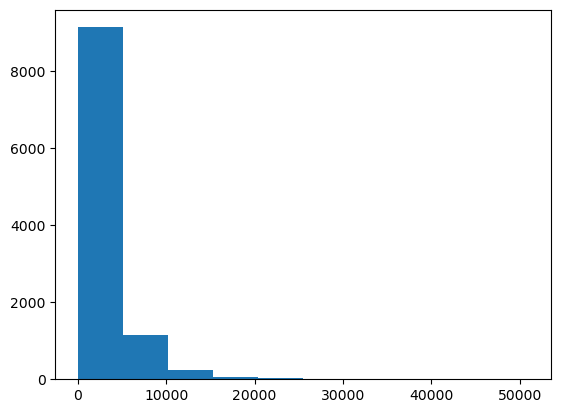

In [994]:
plt.hist(sum_weight_per_port)

In [995]:
#grouping by supplier to see if there are specific customers that they go to. Will follow up to see if certain customers receive the same category
trade_df.groupby('Supplier')['Customer'].value_counts()
#initial look seems to show that a supplier just has one customer and that a supplier doesn't have multiple transactions to different customers 

Supplier                     Customer        
Abbott LLC                   Maria Harris        1
Abbott and Sons              Joy Beard           1
Abbott, Olson and Allen      Ronald Woods        1
Abbott, Taylor and Moreno    Dennis Taylor       1
Abbott-Oconnell              Julie Smith         1
                                                ..
Zuniga and Sons              Trevor Santos       1
Zuniga, King and Marquez     Brandon Neal        1
Zuniga, Perez and Martin     Adrian Kelley       1
Zuniga, Schwartz and Butler  Christina Martin    1
Zuniga-Brown                 Roger Lopez         1
Name: count, Length: 15000, dtype: int64

In [996]:
#determining the AMOUNT not the weight of each category
category_quantity_group_df = trade_df.groupby('Category')['Quantity'].sum()
category_quantity_group_df

Category
Clothing       15316103
Electronics    15053498
Furniture      14964316
Machinery      14990568
Toys           14383836
Name: Quantity, dtype: int64

<BarContainer object of 5 artists>

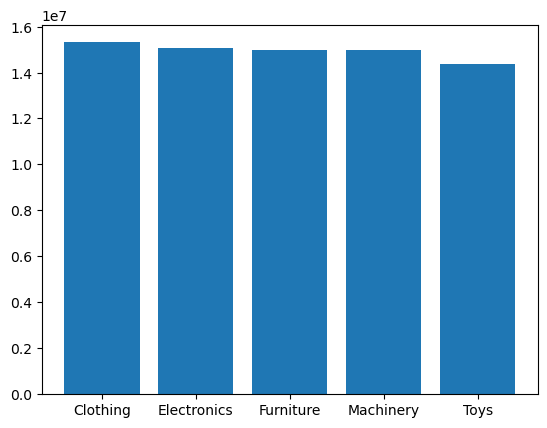

In [997]:
plt.bar(category_quantity_group_df.index, category_quantity_group_df)

In [998]:
#finding the total WEIGHT 
trade_df.groupby('Category')['Weight'].sum()

Category
Clothing       7565598.66
Electronics    7506842.76
Furniture      7543258.53
Machinery      7591018.44
Toys           7175064.49
Name: Weight, dtype: float64

I would like to plot a line chart from the start date to end date of the total amount and weight per category as its changed over the years

I would like to plot a line chart that shows the price per kg of each line category from the start to end date

In [999]:
#x value: date
# y value: quantity 
trade_df['Category'].unique()

array(['Machinery', 'Clothing', 'Electronics', 'Furniture', 'Toys'],
      dtype=object)

In [1000]:
trade_df_ordered = trade_df.sort_values('Date')
trade_df_ordered['Year_Month'] = trade_df_ordered['Date'].dt.strftime('%Y-%m')
trade_df_ordered.head()

,Transaction_ID,Country,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms,DayofWeek,Year_Month
13613,1b966375-c291-4bf1-9004-5f63a53c7195,Cote d'Ivoire,Export,365,8035.52,2019-09-07,Machinery,Suarezland,814620,1768.97,Land,Gardner-Rodriguez,Alexis Barnes,25248525,Prepaid,Saturday,2019-09
3843,2732acd6-2f34-4ad2-a688-f05e7e6f332d,Burundi,Import,654,5527.36,2019-09-07,Machinery,East Lindsayshire,776007,4199.54,Land,"Owens, Reyes and Rowe",Lisa Oconnell,75628282,Cash on Delivery,Saturday,2019-09
9058,c0bb3a74-e5dc-4bf5-896a-3496066308ca,Cayman Islands,Export,8867,4142.66,2019-09-07,Clothing,Debrafurt,468211,113.33,Air,Smith-Green,Jennifer Bridges,72277447,Prepaid,Saturday,2019-09
14556,691e4c70-752b-48f6-97f2-063bd09e39b5,Moldova,Import,3353,3286.39,2019-09-07,Furniture,Patelfurt,423817,4095.20,Sea,"Baird, Wright and Johnson",Jeffrey Good,16676641,Net 60,Saturday,2019-09
7280,4f5ac05c-2a83-4718-8d49-f4838a447865,Ghana,Import,9156,3167.02,2019-09-07,Toys,New Ashley,946418,1515.40,Sea,Kennedy-Cook,Joshua Olsen,50322891,Net 60,Saturday,2019-09


In [1001]:
sum_of_import_export_amount = trade_df.groupby('Port')['Import_Export'].count()
top_5_ports_by_import_export_amount = sum_of_import_export_amount.sort_values(ascending = False)
top_5_ports_by_import_export_amount
#need to filter to see the difference between exports and imports 


Port
Lake Michael           20
West Michael           20
Port David             17
New Michael            14
South Michael          14
                       ..
Lake Kathrynborough     1
Lake Kathrynport        1
Lake Katieport          1
Lake Kaylaberg          1
Zoeton                  1
Name: Import_Export, Length: 10657, dtype: int64

In [1002]:
#already completed this earlier
avg_num_of_transactions = sum_of_import_export_amount.mean()
avg_num_of_transactions

1.407525570047856

In [1003]:
import_df = trade_df[trade_df['Import_Export'] == 'Import']
import_counts_per_port = import_df.groupby('Port')['Transaction_ID'].count()
top_5_ports_by_import_count = import_counts_per_port.sort_values(ascending= False)
top_5_ports_by_import_export_amount

Port
Lake Michael           20
West Michael           20
Port David             17
New Michael            14
South Michael          14
                       ..
Lake Kathrynborough     1
Lake Kathrynport        1
Lake Katieport          1
Lake Kaylaberg          1
Zoeton                  1
Name: Import_Export, Length: 10657, dtype: int64

In [1004]:
avg_num_imports_per_port = import_counts_per_port.mean()
avg_num_imports_per_port

1.2432654402102497

In [1005]:
export_df = trade_df[trade_df['Import_Export'] == 'Export']
export_counts_per_port = export_df.groupby('Port')['Transaction_ID'].count()
top_5_ports_by_export_count = export_counts_per_port.sort_values(ascending= False)
top_5_ports_by_export_count

Port
Lake Michael        11
West Michael        11
New Michael         10
East Jennifer        9
East Michael         9
                    ..
Lake Danielhaven     1
Lake Danielfurt      1
Lake Cynthiaview     1
Lake Cynthiafort     1
Zhangtown            1
Name: Transaction_ID, Length: 6040, dtype: int64

In [1006]:
avg_num_of_export_per_port = export_counts_per_port.mean()
avg_num_of_export_per_port

1.2302980132450332

In [1007]:
#First I want to create a new dataframe that indexes by ports so that I can create a new dataframe that 
    #applies a filter in the import_export columns to seperate by net importer and net exporter 
        #hiwl meeting the other conditions of having a great avg in value, quantity, and weight
#should I create an import dataframe and export dataframe to compare the two?
net_importer_port_df = trade_df[trade_df[]]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1150305373.py, line 5)

In [ ]:
trade_df['Import'] = trade_df['Import_Export'] == 'Import'
trade_df.head()
#I want values to return as Yes or No or Import
#do not need this anymore

,Transaction_ID,Country,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms,DayofWeek,Import
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,Export,1979,9506.57,2023-12-07,Machinery,Robertbury,620537,4248.65,Air,"Garrison, Hubbard and Hendricks",Seth Hall,21000294,Cash on Delivery,Thursday,False
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,Export,5763,7100.91,2023-04-04,Clothing,Shahport,927600,4340.81,Air,Webb-Mack,Kimberly Ryan,88738432,Prepaid,Tuesday,False
2,eb1167b3-67a9-4378-bc65-c1e582e2e662,Turkey,Import,5740,2450.34,2024-08-21,Electronics,South Joshuatown,299258,4538.41,Air,"Mendez, Jones and Johnson",Ryan Silva,89922099,Prepaid,Wednesday,True
3,f7c1bd87-4da5-4709-9471-3d60c8a70639,Christmas Island,Export,2592,7226.42,2022-05-09,Furniture,Adamfort,996084,4886.14,Air,Schroeder-Smith,Jacob Gray,63216265,Net 60,Monday,False
4,e443df78-9558-467f-9ba9-1faf7a024204,Finland,Export,2622,2817.29,2023-04-03,Electronics,Juliebury,555981,4406.74,Air,Zimmerman LLC,Amy Stephens,94600248,Cash on Delivery,Monday,False


In [ ]:
trade_df['Export'] = trade_df['Import_Export'] == 'Export'
trade_df.head()
#do not need this anymore

,Transaction_ID,Country,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms,DayofWeek,Export
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,Export,1979,9506.57,2023-12-07,Machinery,Robertbury,620537,4248.65,Air,"Garrison, Hubbard and Hendricks",Seth Hall,21000294,Cash on Delivery,Thursday,True
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,Export,5763,7100.91,2023-04-04,Clothing,Shahport,927600,4340.81,Air,Webb-Mack,Kimberly Ryan,88738432,Prepaid,Tuesday,True
2,eb1167b3-67a9-4378-bc65-c1e582e2e662,Turkey,Import,5740,2450.34,2024-08-21,Electronics,South Joshuatown,299258,4538.41,Air,"Mendez, Jones and Johnson",Ryan Silva,89922099,Prepaid,Wednesday,False
3,f7c1bd87-4da5-4709-9471-3d60c8a70639,Christmas Island,Export,2592,7226.42,2022-05-09,Furniture,Adamfort,996084,4886.14,Air,Schroeder-Smith,Jacob Gray,63216265,Net 60,Monday,True
4,e443df78-9558-467f-9ba9-1faf7a024204,Finland,Export,2622,2817.29,2023-04-03,Electronics,Juliebury,555981,4406.74,Air,Zimmerman LLC,Amy Stephens,94600248,Cash on Delivery,Monday,True


In [ ]:
port_trade_df

Import_Export,Port,Export,Import,Net_Import_Export,Net_Status
0,Aaronborough,8766.61,4405.21,-4361.40,Net Exporter
1,Aaronfurt,0.00,2448.81,2448.81,Net Importer
2,Aaronland,6195.02,0.00,-6195.02,Net Exporter
3,Aaronmouth,19675.87,15606.97,-4068.90,Net Exporter
4,Aaronport,3105.81,0.00,-3105.81,Net Exporter
...,...,...,...,...,...
10652,Zavalashire,3012.12,0.00,-3012.12,Net Exporter
10653,Zhangborough,0.00,9851.27,9851.27,Net Importer
10654,Zhangtown,6630.67,0.00,-6630.67,Net Exporter
10655,Zimmermanmouth,0.00,8596.28,8596.28,Net Importer


In [ ]:
trade_df.head(2)

,Transaction_ID,Country,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms,DayofWeek,Export
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,Export,1979,9506.57,2023-12-07,Machinery,Robertbury,620537,4248.65,Air,"Garrison, Hubbard and Hendricks",Seth Hall,21000294,Cash on Delivery,Thursday,True
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,Export,5763,7100.91,2023-04-04,Clothing,Shahport,927600,4340.81,Air,Webb-Mack,Kimberly Ryan,88738432,Prepaid,Tuesday,True


In [ ]:
test_port = trade_df.groupby('Port')['Value'].sum()
test_port

Port
Aaronborough      13171.82
Aaronfurt          2448.81
Aaronland          6195.02
Aaronmouth        35282.84
Aaronport          3105.81
                    ...   
Zavalashire        3012.12
Zhangborough       9851.27
Zhangtown          6630.67
Zimmermanmouth     8596.28
Zoeton             6287.93
Name: Value, Length: 10657, dtype: float64

In [ ]:
#How do I create a net importer and net exporter column so that I can compare the two top 5 from each data frame 
# or do I need only one trade_df?
port_trade_df = trade_df.groupby(['Port', 'Import_Export'])['Value'].sum().unstack(fill_value=0)
port_trade_df


Import_Export,Export,Import
Port,,
Aaronborough,8766.61,4405.21
Aaronfurt,0.00,2448.81
Aaronland,6195.02,0.00
Aaronmouth,19675.87,15606.97
Aaronport,3105.81,0.00
...,...,...
Zavalashire,3012.12,0.00
Zhangborough,0.00,9851.27
Zhangtown,6630.67,0.00


In [ ]:

#creating new column called Net Import Export
port_trade_df['Net_Import_Export'] = port_trade_df['Import'] - port_trade_df['Export']
port_trade_df['Net_Status'] = port_trade_df['Net_Import_Export'].apply(lambda x: 'Net Importer' if x > 0 else 'Net Exporter')
port_trade_df = port_trade_df.reset_index()
net_exporters = port_trade_df[port_trade_df['Net_Status'] == 'Net Exporter']
top_net_exporters = net_exporters.sort_values(by='Net_Import_Export').head(20)
top_net_exporters

                                

In [ ]:
port_trade_df

Import_Export,Export,Import
Port,,
Aaronborough,8766.61,4405.21
Aaronfurt,0.00,2448.81
Aaronland,6195.02,0.00
Aaronmouth,19675.87,15606.97
Aaronport,3105.81,0.00
...,...,...
Zavalashire,3012.12,0.00
Zhangborough,0.00,9851.27
Zhangtown,6630.67,0.00


In [ ]:
port_trade_df

Import_Export,Port,Export,Import,Net_Import_Export,Net_Status
0,Aaronborough,8766.61,4405.21,-4361.40,Net Exporter
1,Aaronfurt,0.00,2448.81,2448.81,Net Importer
2,Aaronland,6195.02,0.00,-6195.02,Net Exporter
3,Aaronmouth,19675.87,15606.97,-4068.90,Net Exporter
4,Aaronport,3105.81,0.00,-3105.81,Net Exporter
...,...,...,...,...,...
10652,Zavalashire,3012.12,0.00,-3012.12,Net Exporter
10653,Zhangborough,0.00,9851.27,9851.27,Net Importer
10654,Zhangtown,6630.67,0.00,-6630.67,Net Exporter
10655,Zimmermanmouth,0.00,8596.28,8596.28,Net Importer


In [ ]:
# port_trade_df = trade_df.groupby(['Port', 'Import_Export'])['Value'].sum().unstack(fill_value=0)
# #creating new column called Net Import Export
# port_trade_df['Net_Import_Export'] = port_trade_df['Export'] - port_trade_df['Import']
# port_trade_df

In [ ]:
#finding the top 5 net importers 
net_importers = port_trade_df[port_trade_df['Net_Status'] == 'Net Importer']
top_net_importers = net_importers.sort_values(by='Net_Import_Export', ascending=False).head(20)

top_net_importers


Import_Export,Port,Export,Import,Net_Import_Export,Net_Status
5495,New Jennifer,12973.30,49525.38,36552.08,Net Importer
8288,Scottmouth,3312.65,37730.72,34418.07,Net Importer
7497,Port Matthew,5021.71,36665.37,31643.66,Net Importer
2012,East Rebecca,2835.50,33389.81,30554.31,Net Importer
4983,Michelleside,0.00,29707.06,29707.06,Net Importer
5474,New James,17396.23,45522.37,28126.14,Net Importer
8240,Sarahhaven,0.00,27796.38,27796.38,Net Importer
4961,Michaelstad,0.00,27377.78,27377.78,Net Importer
6004,North Amanda,0.00,26987.67,26987.67,Net Importer
3165,Jenniferstad,2254.88,28724.05,26469.17,Net Importer


In [ ]:
net_importers_list = top_net_importers['Port'].tolist()

In [ ]:
net_importers_list

['New Jennifer',
 'Scottmouth',
 'Port Matthew',
 'East Rebecca',
 'Michelleside',
 'New James',
 'Sarahhaven',
 'Michaelstad',
 'North Amanda',
 'Jenniferstad',
 'Martinstad',
 'North Christopher',
 'West Amanda',
 'South Linda',
 'West Christopher',
 'West David',
 'Martinezstad',
 'New Mark',
 'New Daniel',
 'Wilsonborough']

In [ ]:
# net_importer_df = trade_df[trade_df['Port'].isin(["West Michael", "Port David"])]['Shipping_Method'].value_counts()
# net_importer_df = trade_df[trade_df['Port'].isin(["Donnafurt", "Laurafort", "Turnerchester", "Angelashire", "Kathrynchester"])]
# net_importer_df
#can I create a dataframe using the top 5 net importers variable instead of typing out each port name?

,Transaction_ID,Country,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms,DayofWeek,Export
1698,2aee0157-d3e4-4f8f-9f74-7716ffa857c8,Afghanistan,Export,76,2752.72,2020-03-17,Furniture,Turnerchester,182506,2326.48,Land,Rogers-Nelson,Alan Lawrence,37664683,Net 30,Tuesday,True
2664,0e011113-15f3-4777-a63c-32210c099d16,Puerto Rico,Import,2357,4303.05,2022-02-14,Toys,Laurafort,379714,2099.16,Air,"Rowland, Buchanan and Mitchell",Marvin Myers,59324022,Cash on Delivery,Monday,False
4301,cd68fd5e-c022-4891-bef1-fe17bfdec90a,Lebanon,Import,9500,4436.44,2024-08-11,Toys,Donnafurt,655136,4548.69,Land,Carter-Farrell,Jennifer Miller,41415752,Cash on Delivery,Sunday,False
6227,2654911b-e5c9-4a73-a20d-1b751a6eeac5,Bhutan,Import,3885,1520.48,2022-10-06,Clothing,Turnerchester,329048,1489.84,Land,"Johns, Martin and Silva",Cheryl Villarreal,71845370,Prepaid,Thursday,False
7737,bd396f19-d155-451d-863a-a6d8e49703e6,Puerto Rico,Import,5699,1744.80,2021-08-21,Toys,Angelashire,497823,3325.98,Air,"Wright, Olson and Nolan",Olivia Turner,64061113,Net 60,Saturday,False
8734,1b36d3c4-f313-4ddb-90a4-584e12974919,Afghanistan,Import,9099,8354.42,2023-02-06,Electronics,Kathrynchester,813186,1484.74,Land,Wu-Bowen,Ashley Harris,65718679,Net 60,Monday,False
9620,f8a292be-d8a8-4c01-93fc-bfa1b48f3bf7,Philippines,Export,4488,1694.81,2022-05-15,Toys,Angelashire,535319,4152.95,Air,Frank-Bradley,Justin Simpson,96797485,Prepaid,Sunday,True
10147,3570fca5-d3ac-4403-a01b-c54e364251ee,Liberia,Export,402,8293.67,2019-09-19,Toys,Kathrynchester,945386,987.55,Sea,"Nelson, Richard and Ayala",Diamond Baxter,32602075,Prepaid,Thursday,True
10497,5bca9cfb-a09a-40f4-aed8-12f21ab5ade0,Timor-Leste,Export,8538,4435.52,2020-02-09,Toys,Donnafurt,871790,735.00,Air,Gray LLC,Alexander Hansen,31409492,Net 30,Sunday,True
12464,fc68bf03-0cd1-4911-8702-8224c2fa4fb9,Belarus,Export,4789,4294.37,2023-08-01,Machinery,Laurafort,436395,4697.35,Air,"Greene, Paul and Rice",James Walker,86829815,Net 60,Tuesday,True


In [ ]:
net_importer_df = trade_df[trade_df['Port'].isin(net_importers_list)]
net_importer_df.head()  

,Transaction_ID,Country,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms,DayofWeek,Export
79,0361524c-2cc0-4859-aa65-24ab713b7e05,South Georgia and the South Sandwich Islands,Export,3044,5792.56,2023-04-24,Furniture,North Christopher,405815,4946.91,Air,Carter LLC,Patty Garcia,21091475,Net 30,Monday,True
523,b3390a6e-a0b8-4e45-9abe-c113a1832fdb,Mozambique,Import,1181,5696.16,2020-08-26,Furniture,New James,185319,1573.17,Land,"Hale, Sanford and Bowen",Kelly Bush,65516618,Net 60,Wednesday,False
664,69199a8a-aea6-4315-88ef-444a6e63ffa4,Dominica,Import,5751,9740.57,2023-01-16,Furniture,Martinstad,238503,3876.49,Air,"Davis, Collins and Jennings",Lauren Taylor,50013121,Net 60,Monday,False
680,f7f1bb27-8066-4563-a0c3-0ce957ac59f2,Oman,Import,5780,9700.66,2020-10-17,Machinery,South Linda,884380,4482.88,Land,Williamson Inc,Eugene Clark,26161869,Prepaid,Saturday,False
761,849648e8-5084-440f-bb8f-5fc77c96eefa,Faroe Islands,Export,1789,2835.50,2020-12-09,Toys,East Rebecca,152233,3114.37,Sea,Snyder-Rodriguez,Cynthia May,81249886,Net 60,Wednesday,True


In [ ]:
net_exporters_list = top_net_exporters['Port'].tolist()
net_exporter_df = trade_df[trade_df['Port'].isin(net_exporters_list)]
net_exporter_df
                           

,Transaction_ID,Country,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms,DayofWeek,Export
133,4578bab3-26a9-4465-a371-ea2c0247145f,Mexico,Import,9933,8527.14,2021-11-14,Electronics,New Michael,543138,2852.28,Air,Lowe PLC,Jean Davenport,53475910,Net 60,Sunday,False
199,dd620222-d9ef-428b-bbcb-50b3961d8dcf,Northern Mariana Islands,Export,8838,1201.24,2023-03-25,Electronics,Port Susan,273778,633.20,Air,Yang Inc,Courtney Petersen,62368997,Net 60,Saturday,True
233,0a3c2c6f-ef2d-4a38-a6e4-b8df0b6d9611,Chad,Export,3744,6503.16,2020-02-29,Furniture,Port John,193548,3896.27,Sea,Ramos and Sons,Cynthia Henry,81766975,Net 30,Saturday,True
283,1cb66f67-46e7-45ad-9bce-35d8cbe88a3f,Mozambique,Export,7737,6956.88,2021-05-21,Machinery,Christopherchester,984970,1944.97,Air,"Ward, Green and Molina",Donna Thompson,98564350,Net 30,Friday,True
503,d48457df-f325-4f2d-8759-5b016c835975,Russian Federation,Import,3149,2418.84,2019-09-22,Electronics,Michaelmouth,978013,4208.03,Air,Palmer Ltd,Christopher Reyes,47272215,Cash on Delivery,Sunday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14286,aab9ef02-60e5-4295-abc3-c72f31a393a7,Namibia,Import,7567,7882.82,2020-10-02,Toys,West James,997198,2597.65,Land,Juarez-Hickman,Joshua Spencer,89818725,Prepaid,Friday,False
14392,19da300c-4109-489d-9e20-84b851f4a99d,Zimbabwe,Export,6427,978.06,2023-11-30,Machinery,Michaelmouth,443266,4928.66,Air,"Aguilar, Johnson and Knight",David Fernandez,91702511,Cash on Delivery,Thursday,True
14407,20837629-e9f8-4fb7-9023-3d333d3fd550,Portugal,Import,5000,1500.24,2023-01-09,Clothing,West Kelly,800344,2707.13,Sea,Jones Inc,Karen Nelson,81082253,Prepaid,Monday,False
14477,080c4ebf-04a3-487c-8e31-e2e811e4bc36,France,Export,6142,8715.10,2020-03-12,Toys,Laurenville,703290,4127.90,Land,Adams-Sweeney,Lisa Guerrero,33905001,Cash on Delivery,Thursday,True


Cleaned data to filter down to the top 20 net importer and top 20 net exporter ports

In [ ]:
duplicate_ports = net_exporter_df[net_exporter_df['Port'].isin(net_importer_df['Port'])]
duplicate_ports
#no duplicates foudn 

,Transaction_ID,Country,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms,DayofWeek,Export


In [ ]:
# exporter_counties = port_trade_df.groupby('Port')['Country'].value_counts()
# exporter_counties.info()

In [ ]:
net_exporter_df

,Transaction_ID,Country,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms,DayofWeek,Export
133,4578bab3-26a9-4465-a371-ea2c0247145f,Mexico,Import,9933,8527.14,2021-11-14,Electronics,New Michael,543138,2852.28,Air,Lowe PLC,Jean Davenport,53475910,Net 60,Sunday,False
199,dd620222-d9ef-428b-bbcb-50b3961d8dcf,Northern Mariana Islands,Export,8838,1201.24,2023-03-25,Electronics,Port Susan,273778,633.20,Air,Yang Inc,Courtney Petersen,62368997,Net 60,Saturday,True
233,0a3c2c6f-ef2d-4a38-a6e4-b8df0b6d9611,Chad,Export,3744,6503.16,2020-02-29,Furniture,Port John,193548,3896.27,Sea,Ramos and Sons,Cynthia Henry,81766975,Net 30,Saturday,True
283,1cb66f67-46e7-45ad-9bce-35d8cbe88a3f,Mozambique,Export,7737,6956.88,2021-05-21,Machinery,Christopherchester,984970,1944.97,Air,"Ward, Green and Molina",Donna Thompson,98564350,Net 30,Friday,True
503,d48457df-f325-4f2d-8759-5b016c835975,Russian Federation,Import,3149,2418.84,2019-09-22,Electronics,Michaelmouth,978013,4208.03,Air,Palmer Ltd,Christopher Reyes,47272215,Cash on Delivery,Sunday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14286,aab9ef02-60e5-4295-abc3-c72f31a393a7,Namibia,Import,7567,7882.82,2020-10-02,Toys,West James,997198,2597.65,Land,Juarez-Hickman,Joshua Spencer,89818725,Prepaid,Friday,False
14392,19da300c-4109-489d-9e20-84b851f4a99d,Zimbabwe,Export,6427,978.06,2023-11-30,Machinery,Michaelmouth,443266,4928.66,Air,"Aguilar, Johnson and Knight",David Fernandez,91702511,Cash on Delivery,Thursday,True
14407,20837629-e9f8-4fb7-9023-3d333d3fd550,Portugal,Import,5000,1500.24,2023-01-09,Clothing,West Kelly,800344,2707.13,Sea,Jones Inc,Karen Nelson,81082253,Prepaid,Monday,False
14477,080c4ebf-04a3-487c-8e31-e2e811e4bc36,France,Export,6142,8715.10,2020-03-12,Toys,Laurenville,703290,4127.90,Land,Adams-Sweeney,Lisa Guerrero,33905001,Cash on Delivery,Thursday,True


In [ ]:
net_exporter_df.groupby('Port')['Import_Export'].count()

Port
Angelaville            3
Ashleyshire            3
Christopherchester     5
Cynthiachester         4
East Ashley            6
East Erin              3
East Jennifer         10
Jenniferville          4
Johnsonhaven           4
Laurenville            3
Martinezberg           4
Michaelmouth          12
New Michael           14
Port John              6
Port Katherine         5
Port Susan             5
Smithberg              7
Smithmouth             6
West James             8
West Kelly             6
Name: Import_Export, dtype: int64

Use net_importer_df & net_exporter_df for DFs moving forward 

In [ ]:
#compare dollar per transaction value for imports/exports between net importers and net exporters
#compare category of net importers and net exporters
    #which categories do they import/export and for how much?


In [ ]:
top_net_importers

Import_Export,Port,Export,Import,Net_Import_Export,Net_Status
5495,New Jennifer,12973.30,49525.38,36552.08,Net Importer
8288,Scottmouth,3312.65,37730.72,34418.07,Net Importer
7497,Port Matthew,5021.71,36665.37,31643.66,Net Importer
2012,East Rebecca,2835.50,33389.81,30554.31,Net Importer
4983,Michelleside,0.00,29707.06,29707.06,Net Importer
5474,New James,17396.23,45522.37,28126.14,Net Importer
8240,Sarahhaven,0.00,27796.38,27796.38,Net Importer
4961,Michaelstad,0.00,27377.78,27377.78,Net Importer
6004,North Amanda,0.00,26987.67,26987.67,Net Importer
3165,Jenniferstad,2254.88,28724.05,26469.17,Net Importer


In [ ]:
net_importer_df.groupby('Port')['Value'].sum()


Port
East Rebecca         36225.31
Jenniferstad         30978.93
Martinezstad         25827.08
Martinstad           28307.62
Michaelstad          27377.78
Michelleside         29707.06
New Daniel           34621.21
New James            62918.60
New Jennifer         62498.68
New Mark             24483.89
North Amanda         26987.67
North Christopher    64487.75
Port Matthew         41687.08
Sarahhaven           27796.38
Scottmouth           41043.37
South Linda          25839.09
West Amanda          33619.83
West Christopher     43227.53
West David           51302.96
Wilsonborough        39936.53
Name: Value, dtype: float64

In [ ]:
net_importer_df

,Transaction_ID,Country,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms,DayofWeek,Export
79,0361524c-2cc0-4859-aa65-24ab713b7e05,South Georgia and the South Sandwich Islands,Export,3044,5792.56,2023-04-24,Furniture,North Christopher,405815,4946.91,Air,Carter LLC,Patty Garcia,21091475,Net 30,Monday,True
523,b3390a6e-a0b8-4e45-9abe-c113a1832fdb,Mozambique,Import,1181,5696.16,2020-08-26,Furniture,New James,185319,1573.17,Land,"Hale, Sanford and Bowen",Kelly Bush,65516618,Net 60,Wednesday,False
664,69199a8a-aea6-4315-88ef-444a6e63ffa4,Dominica,Import,5751,9740.57,2023-01-16,Furniture,Martinstad,238503,3876.49,Air,"Davis, Collins and Jennings",Lauren Taylor,50013121,Net 60,Monday,False
680,f7f1bb27-8066-4563-a0c3-0ce957ac59f2,Oman,Import,5780,9700.66,2020-10-17,Machinery,South Linda,884380,4482.88,Land,Williamson Inc,Eugene Clark,26161869,Prepaid,Saturday,False
761,849648e8-5084-440f-bb8f-5fc77c96eefa,Faroe Islands,Export,1789,2835.50,2020-12-09,Toys,East Rebecca,152233,3114.37,Sea,Snyder-Rodriguez,Cynthia May,81249886,Net 60,Wednesday,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14246,75e49d10-3f05-4098-913f-cd85200e4250,Libyan Arab Jamahiriya,Import,2017,136.96,2023-06-04,Machinery,West David,187654,1546.88,Sea,"Espinoza, Fox and Harris",Valerie Thompson,11048427,Prepaid,Sunday,False
14309,3ac6d4ba-a38c-452e-9974-56725d92f013,Brunei Darussalam,Import,9760,9318.16,2020-12-27,Furniture,West David,992404,3127.10,Air,Webb-Mclean,Christine Nguyen,89869542,Cash on Delivery,Sunday,False
14601,3a65e46e-dd4a-4ce3-b228-09237aff7c8d,Cocos (Keeling) Islands,Export,2577,9070.33,2024-06-16,Toys,North Christopher,106891,4823.13,Land,Bridges Inc,Benjamin Reeves,21160061,Net 60,Sunday,True
14679,9c31f087-18bd-4e71-887e-959595e01b5e,Tunisia,Export,2036,4724.25,2020-08-15,Machinery,New James,967750,4689.61,Sea,Green-Johns,Paula Manning,70827899,Cash on Delivery,Saturday,True


In [ ]:


net_importers_import_filter = net_importer_df[net_importer_df['Import_Export'] == 'Import']
net_importers_import_total_value = net_importers_import_filter.groupby('Port')['Value'].sum()
# net_importers_import_total_value.sum()
net_importers_import_total_value

#NOW DO THIS FOR EXPORTS FOR NET IMPORTERS AND IMPORT AND EXPORTS FOR NET EXPORTERS
#this should lead to are the categories of products and shipping methods different between net imporers and exporters

Port
East Rebecca         33389.81
Jenniferstad         28724.05
Martinezstad         25220.77
Martinstad           27302.54
Michaelstad          27377.78
Michelleside         29707.06
New Daniel           29428.03
New James            45522.37
New Jennifer         49525.38
New Mark             24483.89
North Amanda         26987.67
North Christopher    45321.01
Port Matthew         36665.37
Sarahhaven           27796.38
Scottmouth           37730.72
South Linda          25839.09
West Amanda          29771.30
West Christopher     34446.99
West David           38430.87
Wilsonborough        32074.05
Name: Value, dtype: float64

In [ ]:
net_importer_df

,Transaction_ID,Country,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms,DayofWeek,Export
79,0361524c-2cc0-4859-aa65-24ab713b7e05,South Georgia and the South Sandwich Islands,Export,3044,5792.56,2023-04-24,Furniture,North Christopher,405815,4946.91,Air,Carter LLC,Patty Garcia,21091475,Net 30,Monday,True
523,b3390a6e-a0b8-4e45-9abe-c113a1832fdb,Mozambique,Import,1181,5696.16,2020-08-26,Furniture,New James,185319,1573.17,Land,"Hale, Sanford and Bowen",Kelly Bush,65516618,Net 60,Wednesday,False
664,69199a8a-aea6-4315-88ef-444a6e63ffa4,Dominica,Import,5751,9740.57,2023-01-16,Furniture,Martinstad,238503,3876.49,Air,"Davis, Collins and Jennings",Lauren Taylor,50013121,Net 60,Monday,False
680,f7f1bb27-8066-4563-a0c3-0ce957ac59f2,Oman,Import,5780,9700.66,2020-10-17,Machinery,South Linda,884380,4482.88,Land,Williamson Inc,Eugene Clark,26161869,Prepaid,Saturday,False
761,849648e8-5084-440f-bb8f-5fc77c96eefa,Faroe Islands,Export,1789,2835.50,2020-12-09,Toys,East Rebecca,152233,3114.37,Sea,Snyder-Rodriguez,Cynthia May,81249886,Net 60,Wednesday,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14246,75e49d10-3f05-4098-913f-cd85200e4250,Libyan Arab Jamahiriya,Import,2017,136.96,2023-06-04,Machinery,West David,187654,1546.88,Sea,"Espinoza, Fox and Harris",Valerie Thompson,11048427,Prepaid,Sunday,False
14309,3ac6d4ba-a38c-452e-9974-56725d92f013,Brunei Darussalam,Import,9760,9318.16,2020-12-27,Furniture,West David,992404,3127.10,Air,Webb-Mclean,Christine Nguyen,89869542,Cash on Delivery,Sunday,False
14601,3a65e46e-dd4a-4ce3-b228-09237aff7c8d,Cocos (Keeling) Islands,Export,2577,9070.33,2024-06-16,Toys,North Christopher,106891,4823.13,Land,Bridges Inc,Benjamin Reeves,21160061,Net 60,Sunday,True
14679,9c31f087-18bd-4e71-887e-959595e01b5e,Tunisia,Export,2036,4724.25,2020-08-15,Machinery,New James,967750,4689.61,Sea,Green-Johns,Paula Manning,70827899,Cash on Delivery,Saturday,True


In [ ]:
#trying to get the sum and average for just imports for net importers
top_net_importers
net_importers_import_value_sum = top_net_importers['Import'].sum()
net_importers_import_value_sum

655745.1300000001

In [ ]:
top_net_importers

Import_Export,Port,Export,Import,Net_Import_Export,Net_Status
5495,New Jennifer,12973.30,49525.38,36552.08,Net Importer
8288,Scottmouth,3312.65,37730.72,34418.07,Net Importer
7497,Port Matthew,5021.71,36665.37,31643.66,Net Importer
2012,East Rebecca,2835.50,33389.81,30554.31,Net Importer
4983,Michelleside,0.00,29707.06,29707.06,Net Importer
5474,New James,17396.23,45522.37,28126.14,Net Importer
8240,Sarahhaven,0.00,27796.38,27796.38,Net Importer
4961,Michaelstad,0.00,27377.78,27377.78,Net Importer
6004,North Amanda,0.00,26987.67,26987.67,Net Importer
3165,Jenniferstad,2254.88,28724.05,26469.17,Net Importer


In [ ]:
net_importers_import_value_avg = top_net_importers['Import'].mean()
net_importers_import_value_sum = top_net_importers['Import'].sum()
net_importers_export_value_avg = top_net_importers['Export'].mean()
net_importers_export_value_sum = top_net_importers['Export'].sum()


In [ ]:
net_importers_import_value_sum

655745.1300000001

In [ ]:
net_exporters_import_value_avg = top_net_exporters['Import'].mean()
net_exporters_import_value_sum = top_net_exporters['Import'].sum()
net_exporters_export_value_avg = top_net_exporters['Export'].mean()
net_exporters_export_value_sum = top_net_exporters['Export'].sum()


In [ ]:
importers_import_df = net_importer_df[net_importer_df['Import_Export']=='Import']
importers_import_df
importers_imnport_count = importers_import_df.groupby('Port').size()
sum_of_imports_by_importers = importers_imnport_count.sum()
sum_of_imports_by_importers

105

In [ ]:
importers_export_df = net_importer_df[net_importer_df['Import_Export']=='Export']
importers_export_count = importers_export_df.groupby('Port').size()
sum_of_exports_by_importers = importers_export_count.sum()
sum_of_exports_by_importers

28

In [ ]:
net_importers_avg_value_per_import = net_importers_import_value_sum / sum_of_imports_by_importers
net_importers_avg_value_per_import

6245.1917142857155

In [ ]:
net_importers_avg_value_per_export = net_importers_export_value_sum / sum_of_exports_by_importers
net_importers_avg_value_per_export

3683.186428571428

In [ ]:
exporters_import_df = net_exporter_df[net_exporter_df['Import_Export']=='Import']
exporters_imnport_count = exporters_import_df.groupby('Port').size()
sum_of_imports_by_exporters = exporters_imnport_count.sum()
sum_of_imports_by_exporters

17

In [ ]:
net_exporters_avg_value_per_import = net_exporters_import_value_sum / sum_of_imports_by_exporters
net_exporters_avg_value_per_import

4077.526470588235

In [ ]:
exporters_export_df = net_exporter_df[net_exporter_df['Import_Export']=='Export']
exporters_export_count = exporters_export_df.groupby('Port').size()
sum_of_exports_by_exporters = exporters_export_count.sum()
sum_of_exports_by_exporters


101

In [ ]:
net_exporters_avg_value_per_export = net_exporters_export_value_sum / sum_of_exports_by_exporters
net_exporters_avg_value_per_export

6303.72722772277

FINISHED FINDING AVG VALUE PER IMPORT AND EXPORT FOR NET IMPORTERS AND NET EXPORTERS
NOW FINDING THE COUNTS OF PRODUCT CATEOGORIES BETWEEN NET IMPORTERS AND NET EXPORTERS
    THEN DRILL DOWN TO SEE THE DIFFERENCE AVG PRICE OF CATEGORIES BETWEEN IMPORTS AND EXPORTS FOR NET IMPORTERS AND NET EXPORTERS

In [ ]:
importers_import_df = net_importer_df[net_importer_df['Import_Export']=='Import']
importers_import_df
importers_imnport_count = importers_import_df.groupby('Port').size()
avg_num_of_imports_by_port_for_importers = importers_imnport_count.mean()
avg_num_of_imports_by_port_for_importers
#USE THIS TO SAY WHAT THE AVG PRICE PER TRANSACTION IS FOR IMPORTS FOR NET IMPORTERS 
#DO THE SAME FOR AVG PRICE PER TRANSACTION FOR EXPORTS FOR NET IMPORTS 
#THEN AVG PRICE PER IMPORT/EXPORT FOR NET EXPORTERS



5.25

In [ ]:
importers_export_df = net_importer_df[net_importer_df['Import_Export']=='Export']
importers_export_count = importers_export_df.groupby('Port').size()
avg_num_of_exports_by_port_for_exporters = importers_export_count.mean()
avg_num_of_exports_by_port_for_exporters



2.0

In [ ]:
exporters_import_df = net_exporter_df[net_exporter_df['Import_Export']=='Import']
exporters_import_count = exporters_import_df.groupby('Port').size()
avg_num_of_imports_by_port_for_exporters = exporters_import_count.mean()
avg_num_of_imports_by_port_for_exporters


1.7

In [ ]:
exporters_export_df = net_exporter_df[net_exporter_df['Import_Export']=='Export']
exporters_export_count = exporters_export_df.groupby('Port').size()
avg_num_of_exports_by_port_for_exporters = exporters_export_count.mean()
avg_num_of_exports_by_port_for_exporters

5.05

In [ ]:
top_net_exporters

Import_Export,Port,Export,Import,Net_Import_Export,Net_Status
1754,East Jennifer,49911.78,742.98,-49168.80,Net Exporter
5692,New Michael,62804.64,17136.43,-45668.21,Net Exporter
4957,Michaelmouth,58172.37,13528.23,-44644.14,Net Exporter
7385,Port Katherine,30769.94,0.00,-30769.94,Net Exporter
1170,Cynthiachester,29461.55,0.00,-29461.55,Net Exporter
3169,Jenniferville,27715.49,0.00,-27715.49,Net Exporter
10142,West Kelly,28159.70,1500.24,-26659.46,Net Exporter
7684,Port Susan,26435.82,0.00,-26435.82,Net Exporter
3267,Johnsonhaven,26252.81,0.00,-26252.81,Net Exporter
10024,West James,39798.85,14342.52,-25456.33,Net Exporter


Next question is which category of products is most often exported versus imported between net importers and net exporters

In [ ]:
importers_categories_for_importers = importers_import_df['Category'].value_counts()

In [ ]:
importers_categories_for_exports = importers_export_df['Category'].value_counts()

In [ ]:
exporters_categories_for_imports = exporters_import_df['Category'].value_counts()


In [ ]:
exporters_categories_for_exports = exporters_export_df['Category'].value_counts()

In [ ]:
importers_category = importers_import_df.groupby('Port')['Category'].value_counts()
importers_category


Port           Category   
East Rebecca   Electronics    3
               Furniture      1
Jenniferstad   Clothing       1
               Electronics    1
               Furniture      1
                             ..
West David     Machinery      2
               Electronics    1
Wilsonborough  Furniture      2
               Machinery      2
               Electronics    1
Name: count, Length: 65, dtype: int64

In [ ]:
total_value_by_category_for_imports_by_importers = importers_import_df.groupby(['Port', 'Category'])['Value'].sum()
total_value_by_category_for_imports_by_importers

Port           Category   
East Rebecca   Electronics    25092.75
               Furniture       8297.06
Jenniferstad   Clothing        7132.33
               Electronics     9192.75
               Furniture       5891.76
                                ...   
West David     Furniture      12271.57
               Machinery       9800.82
Wilsonborough  Electronics     4444.23
               Furniture      13174.47
               Machinery      14455.35
Name: Value, Length: 65, dtype: float64

In [ ]:
total_value_by_category_for_exports_by_importers = importers_export_df.groupby(['Port', 'Category'])['Value'].sum()
total_value_by_category_for_exports_by_importers

Port               Category   
East Rebecca       Toys            2835.50
Jenniferstad       Toys            2254.88
Martinezstad       Toys             606.31
Martinstad         Furniture       1005.08
New Daniel         Machinery       5193.18
New James          Furniture       3772.58
                   Machinery      13623.65
New Jennifer       Electronics     1237.28
                   Furniture       3830.47
                   Machinery       7905.55
North Christopher  Furniture       6732.42
                   Machinery       3363.99
                   Toys            9070.33
Port Matthew       Clothing        3169.57
                   Furniture       1852.14
Scottmouth         Clothing        3312.65
West Amanda        Machinery       3848.53
West Christopher   Machinery       8780.54
West David         Clothing         947.75
                   Machinery      11924.34
Wilsonborough      Electronics     7862.48
Name: Value, dtype: float64

In [ ]:
importers_total_value_for_import_categories = importers_import_df.groupby('Category')['Value'].sum()
importers_total_value_for_import_categories

Category
Clothing       101734.74
Electronics    141215.03
Furniture      153062.49
Machinery      153661.51
Toys           106071.36
Name: Value, dtype: float64

In [1008]:
importers_category_counts_for_imports = importers_import_df['Category'].value_counts()
importers_category_counts_for_imports

Category
Machinery      25
Furniture      24
Toys           19
Electronics    19
Clothing       18
Name: count, dtype: int64

In [930]:
avg_value_per_import_category_for_importers = importers_total_value_for_import_categories/importers_category_counts_for_imports

In [929]:
importers_total_value_for_export_categories = importers_export_df.groupby('Category')['Value'].sum()
importers_total_value_for_export_categories

Category
Clothing        7429.97
Electronics     9099.76
Furniture      17192.69
Machinery      54639.78
Toys           14767.02
Name: Value, dtype: float64

In [928]:
importers_category_counts_for_exports = importers_export_df['Category'].value_counts()
importers_category_counts_for_exports

Category
Machinery      12
Furniture       7
Toys            4
Clothing        3
Electronics     2
Name: count, dtype: int64

In [1009]:
avg_value_per_export_category_for_importers = importers_total_value_for_export_categories/importers_category_counts_for_imports
avg_value_per_export_category_for_importers

Category
Clothing        412.776111
Electronics     478.934737
Furniture       716.362083
Machinery      2185.591200
Toys            777.211579
dtype: float64

Start of new for Net Exporters

In [901]:
exporters_total_value_by_import_categories = exporters_import_df.groupby('Category')['Value'].sum()

In [902]:
exporters_category_counts_for_imports = exporters_import_df['Category'].value_counts()

In [903]:
avg_value_per_import_category_for_exporters = exporters_total_value_by_import_categories/exporters_category_counts_for_imports

In [904]:
exporters_total_value_by_export_categories = exporters_export_df.groupby('Category')['Value'].sum()

In [905]:
exporters_category_counts_for_exports = exporters_export_df['Category'].value_counts()

In [906]:
avg_value_per_export_category_for_exporters = exporters_total_value_by_export_categories/exporters_category_counts_for_exports

In [909]:
# fig, ax = plt.subplots()
# ax.plot(net_importers_avg_value_per_import, net_exporters_avg_value_per_import)

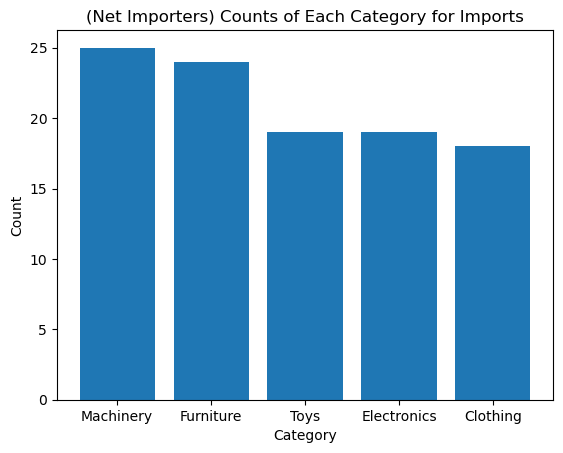

In [916]:
fig, ax = plt.subplots()
ax.bar(importers_category_counts_for_imports.index, importers_category_counts_for_imports.values)
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('(Net Importers) Counts of Each Category for Imports')
plt.show()

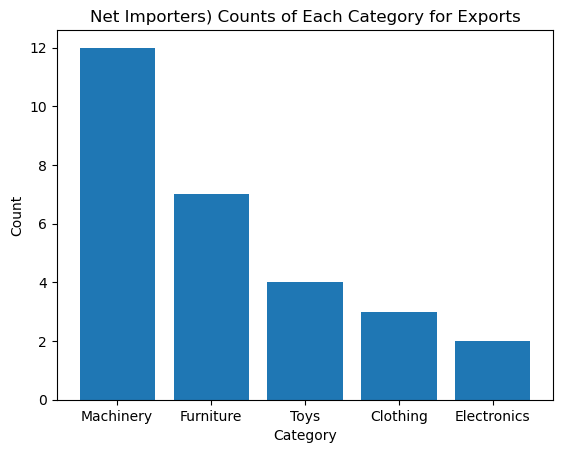

In [1024]:
fig, ax = plt.subplots()
ax.bar(importers_category_counts_for_exports.index, importers_category_counts_for_exports.values)
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Net Importers) Counts of Each Category for Exports')
plt.show()

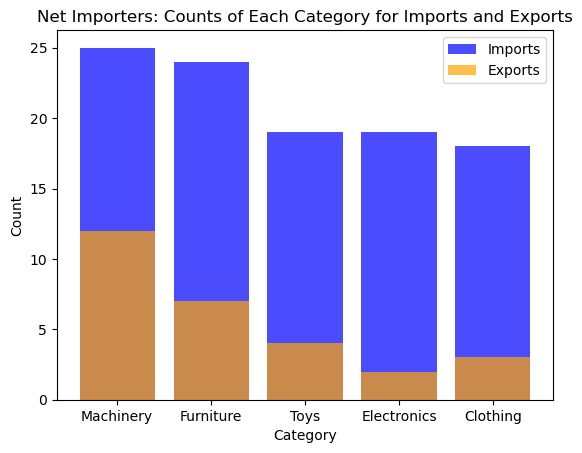

In [1025]:
fig, ax = plt.subplots()

# Plot imports
ax.bar(importers_category_counts_for_imports.index, importers_category_counts_for_imports.values, label='Imports', alpha=0.7, color='blue')

# Plot exports
ax.bar(importers_category_counts_for_exports.index, importers_category_counts_for_exports.values, label='Exports', alpha=0.7, color='orange')

# Customize the plot
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Net Importers: Counts of Each Category for Imports and Exports')
ax.legend()

# Show the plot
plt.show()

Comparing this graph with Net Exporters Now

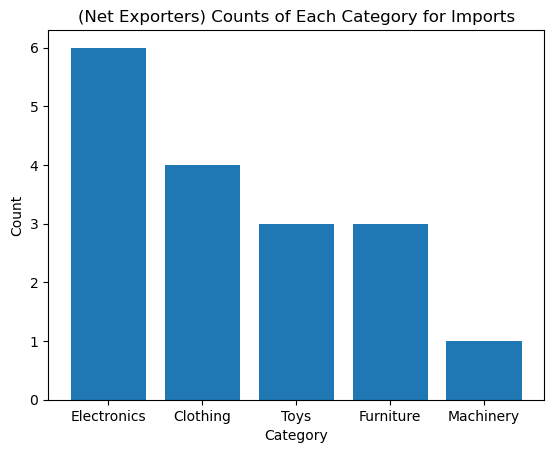

In [919]:
fig, ax = plt.subplots()
ax.bar(exporters_category_counts_for_imports.index, exporters_category_counts_for_imports.values)
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('(Net Exporters) Counts of Each Category for Imports')
plt.show()

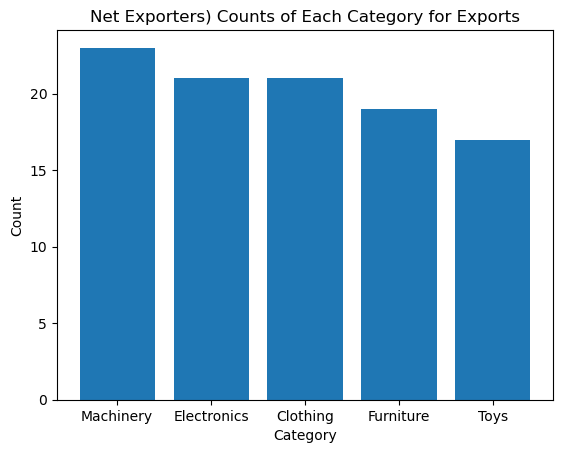

In [920]:
fig, ax = plt.subplots()
ax.bar(exporters_category_counts_for_exports.index, exporters_category_counts_for_exports.values)
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Net Exporters) Counts of Each Category for Exports')
plt.show()

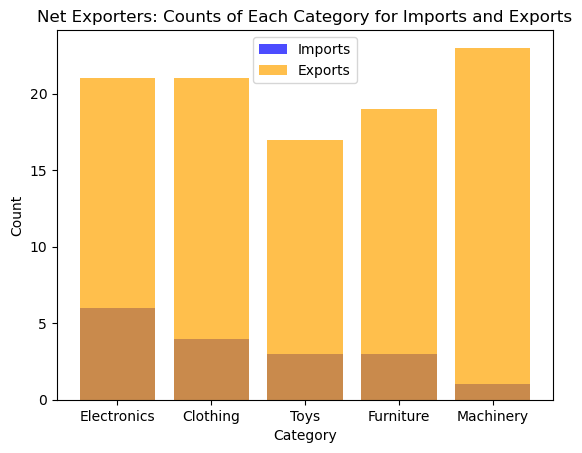

In [921]:
fig, ax = plt.subplots()

# Plot imports
ax.bar(exporters_category_counts_for_imports.index, exporters_category_counts_for_imports.values, label='Imports', alpha=0.7, color='blue')

# Plot exports
ax.bar(exporters_category_counts_for_exports.index, exporters_category_counts_for_exports.values, label='Exports', alpha=0.7, color='orange')

# Customize the plot
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Net Exporters: Counts of Each Category for Imports and Exports')
ax.legend()

# Show the plot
plt.show()

Avg Value of Imports and Exports by Category

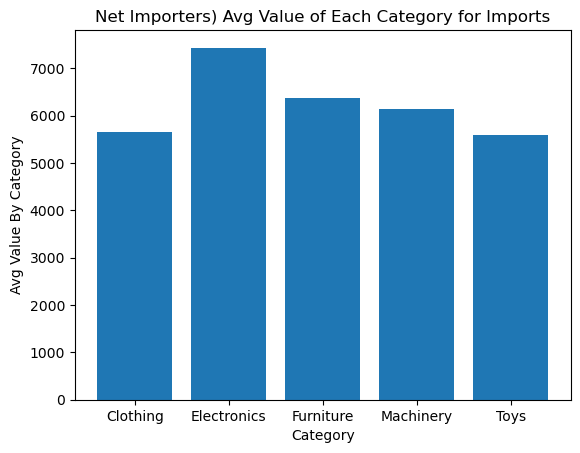

In [1010]:
fig, ax = plt.subplots()
ax.bar(avg_value_per_import_category_for_importers.index, avg_value_per_import_category_for_importers.values)
ax.set_xlabel('Category')
ax.set_ylabel('Avg Value By Category')
ax.set_title('Net Importers) Avg Value of Each Category for Imports')
plt.show()

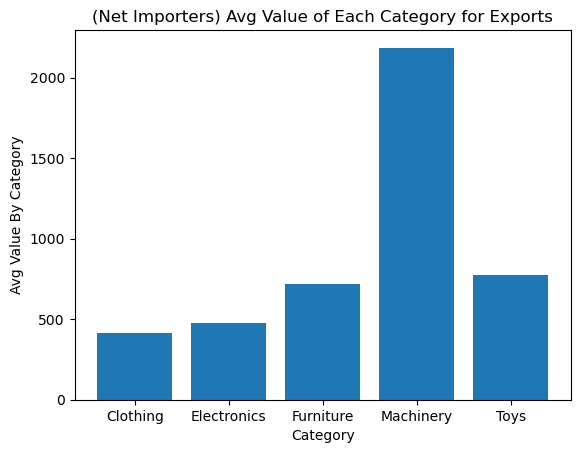

In [1011]:
fig, ax = plt.subplots()
ax.bar(avg_value_per_export_category_for_importers.index, avg_value_per_export_category_for_importers.values)
ax.set_xlabel('Category')
ax.set_ylabel('Avg Value By Category')
ax.set_title('(Net Importers) Avg Value of Each Category for Exports')
plt.show()

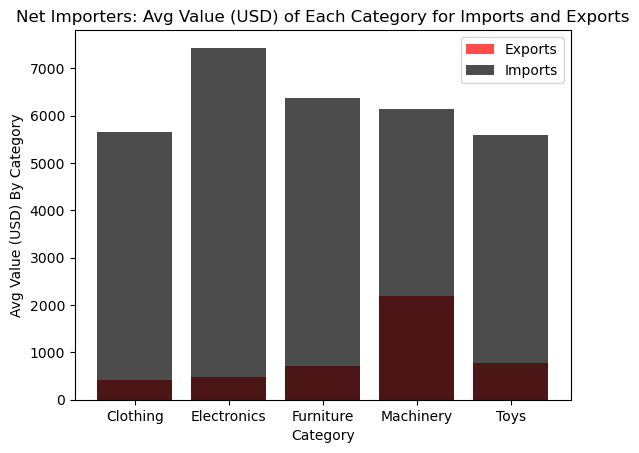

In [1017]:
fig, ax = plt.subplots()

# Plot exports
ax.bar(avg_value_per_export_category_for_importers.index, avg_value_per_export_category_for_importers.values, label='Exports', alpha=0.7, color='r')

# Plot imports
ax.bar(avg_value_per_import_category_for_importers.index, avg_value_per_import_category_for_importers.values, label='Imports', alpha=0.7, color='black')

# Customize the plot
ax.set_xlabel('Category')
ax.set_ylabel('Avg Value (USD) By Category')
ax.set_title('Net Importers: Avg Value (USD) of Each Category for Imports and Exports')
ax.legend()

# Show the plot
plt.show()

In [1012]:
combined_df = pd.DataFrame({
    'Avg_Value_Per_Export': avg_value_per_export_category_for_importers,
    'Avg_Value_Per_Import': avg_value_per_import_category_for_importers
})

# Calculate the correlation
correlation = combined_df['Avg_Value_Per_Export'].corr(combined_df['Avg_Value_Per_Import'])

print("Correlation between Avg Value per Export and Avg Value per Import:", correlation)

Correlation between Avg Value per Export and Avg Value per Import: -0.129107595378797


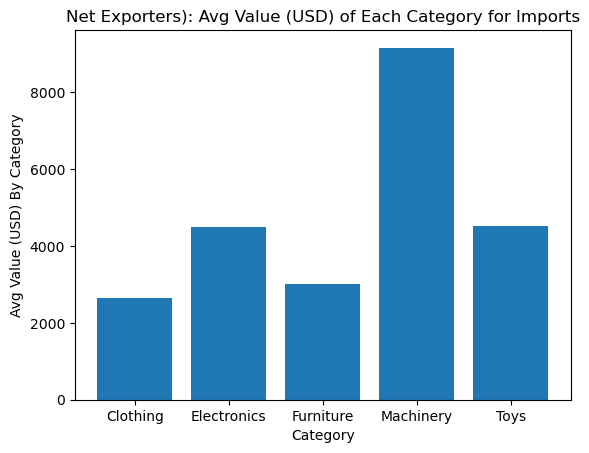

In [1019]:
fig, ax = plt.subplots()
ax.bar(avg_value_per_import_category_for_exporters.index, avg_value_per_import_category_for_exporters.values)
ax.set_xlabel('Category')
ax.set_ylabel('Avg Value (USD) By Category')
ax.set_title('Net Exporters): Avg Value (USD) of Each Category for Imports')
plt.show()

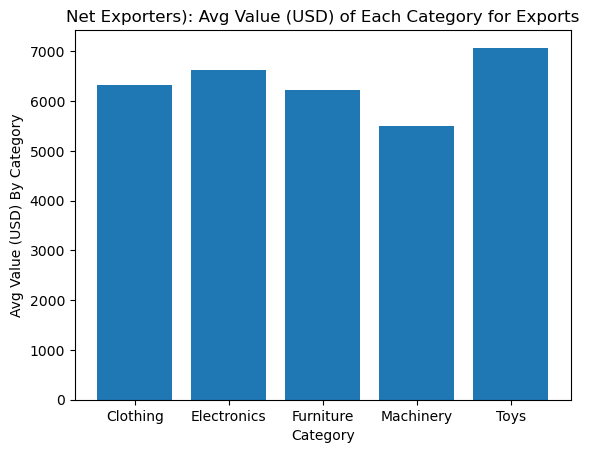

In [1020]:
fig, ax = plt.subplots()
ax.bar(avg_value_per_export_category_for_exporters.index, avg_value_per_export_category_for_exporters.values)
ax.set_xlabel('Category')
ax.set_ylabel('Avg Value (USD) By Category')
ax.set_title('Net Exporters): Avg Value (USD) of Each Category for Exports')
plt.show()

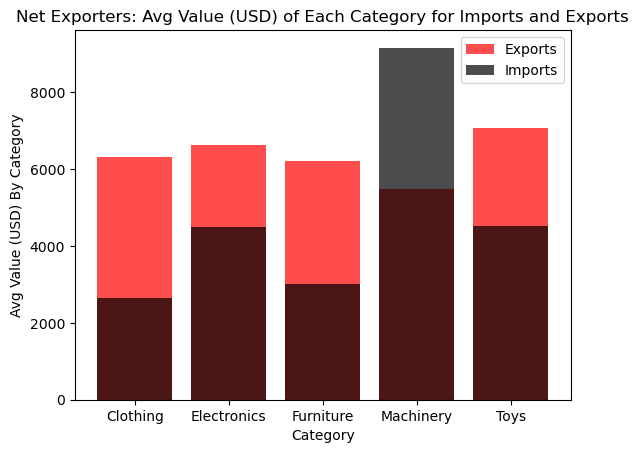

In [1021]:
fig, ax = plt.subplots()

# Plot exports
ax.bar(avg_value_per_export_category_for_exporters.index, avg_value_per_export_category_for_exporters.values, label='Exports', alpha=0.7, color='r')

# Plot imports
ax.bar(avg_value_per_import_category_for_exporters.index, avg_value_per_import_category_for_exporters.values, label='Imports', alpha=0.7, color='black')

# Customize the plot
ax.set_xlabel('Category')
ax.set_ylabel('Avg Value (USD) By Category')
ax.set_title('Net Exporters: Avg Value (USD) of Each Category for Imports and Exports')
ax.legend()

# Show the plot
plt.show()

Combined DataFrame:
              Avg_Export_Value_Exporters  Avg_Import_Value_Exporters  \
Category                                                              
Clothing                    6316.769524                 2658.890000   
Electronics                 6630.022381                 4490.400000   
Furniture                   6218.666842                 3012.336667   
Machinery                   5496.309565                 9164.660000   
Toys                        7072.001765                 4512.773333   

             Avg_Export_Value_Importers  Avg_Import_Value_Importers  
Category                                                             
Clothing                     412.776111                 5651.930000  
Electronics                  478.934737                 7432.370000  
Furniture                    716.362083                 6377.603750  
Machinery                   2185.591200                 6146.460400  
Toys                         777.211579                 5582.

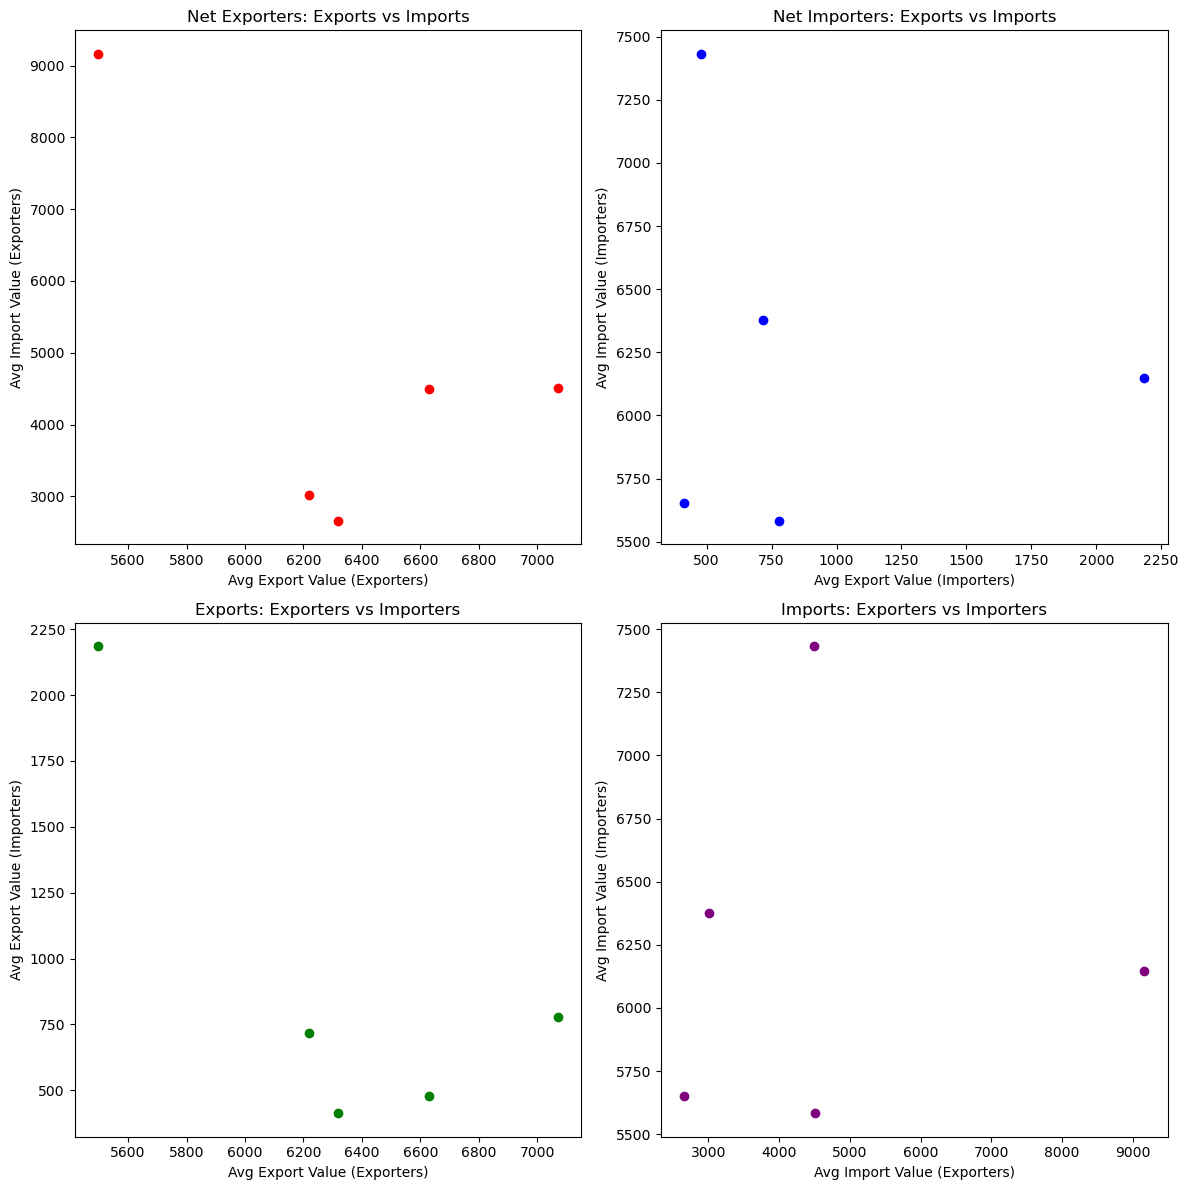

Correlation between Avg Export Value and Avg Import Value for Exporters: -0.6159822730328675
Correlation between Avg Export Value and Avg Import Value for Importers: -0.129107595378797
Correlation between Avg Export Value for Exporters and Importers: -0.7486081106354816
Correlation between Avg Import Value for Exporters and Importers: 0.05469984341683959


In [1022]:
combined_df = pd.DataFrame({
    'Avg_Export_Value_Exporters': avg_value_per_export_category_for_exporters,
    'Avg_Import_Value_Exporters': avg_value_per_import_category_for_exporters,
    'Avg_Export_Value_Importers': avg_value_per_export_category_for_importers,
    'Avg_Import_Value_Importers': avg_value_per_import_category_for_importers
})

print("Combined DataFrame:\n", combined_df)

# Scatter plots to visualize relationships
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Exporters: Exports vs Imports
axs[0, 0].scatter(combined_df['Avg_Export_Value_Exporters'], combined_df['Avg_Import_Value_Exporters'], color='r')
axs[0, 0].set_xlabel('Avg Export Value (Exporters)')
axs[0, 0].set_ylabel('Avg Import Value (Exporters)')
axs[0, 0].set_title('Net Exporters: Exports vs Imports')

# Importers: Exports vs Imports
axs[0, 1].scatter(combined_df['Avg_Export_Value_Importers'], combined_df['Avg_Import_Value_Importers'], color='b')
axs[0, 1].set_xlabel('Avg Export Value (Importers)')
axs[0, 1].set_ylabel('Avg Import Value (Importers)')
axs[0, 1].set_title('Net Importers: Exports vs Imports')

# Exporters vs Importers: Exports
axs[1, 0].scatter(combined_df['Avg_Export_Value_Exporters'], combined_df['Avg_Export_Value_Importers'], color='g')
axs[1, 0].set_xlabel('Avg Export Value (Exporters)')
axs[1, 0].set_ylabel('Avg Export Value (Importers)')
axs[1, 0].set_title('Exports: Exporters vs Importers')

# Exporters vs Importers: Imports
axs[1, 1].scatter(combined_df['Avg_Import_Value_Exporters'], combined_df['Avg_Import_Value_Importers'], color='purple')
axs[1, 1].set_xlabel('Avg Import Value (Exporters)')
axs[1, 1].set_ylabel('Avg Import Value (Importers)')
axs[1, 1].set_title('Imports: Exporters vs Importers')

plt.tight_layout()
plt.show()

# Calculate correlation coefficients
correlation_exporters = combined_df['Avg_Export_Value_Exporters'].corr(combined_df['Avg_Import_Value_Exporters'])
correlation_importers = combined_df['Avg_Export_Value_Importers'].corr(combined_df['Avg_Import_Value_Importers'])
correlation_exports = combined_df['Avg_Export_Value_Exporters'].corr(combined_df['Avg_Export_Value_Importers'])
correlation_imports = combined_df['Avg_Import_Value_Exporters'].corr(combined_df['Avg_Import_Value_Importers'])

print("Correlation between Avg Export Value and Avg Import Value for Exporters:", correlation_exporters)
print("Correlation between Avg Export Value and Avg Import Value for Importers:", correlation_importers)
print("Correlation between Avg Export Value for Exporters and Importers:", correlation_exports)
print("Correlation between Avg Import Value for Exporters and Importers:", correlation_imports)

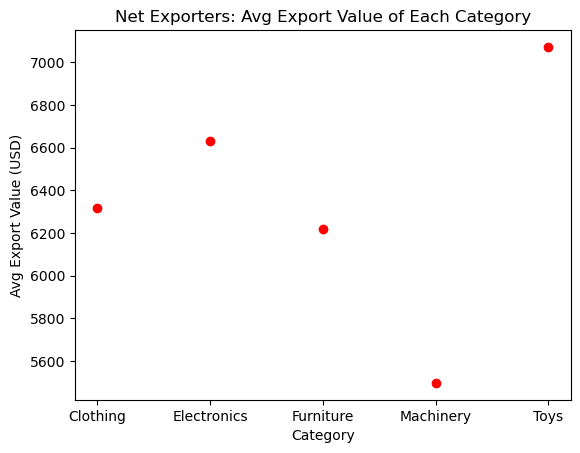

In [1023]:
fig, ax = plt.subplots()

# Plot the data
ax.scatter(avg_value_per_export_category_for_exporters.index, avg_value_per_export_category_for_exporters.values, color='r')

# Customize the plot
ax.set_xlabel('Category')
ax.set_ylabel('Avg Export Value (USD)')
ax.set_title('Net Exporters: Avg Export Value of Each Category')

# Show the plot
plt.show()

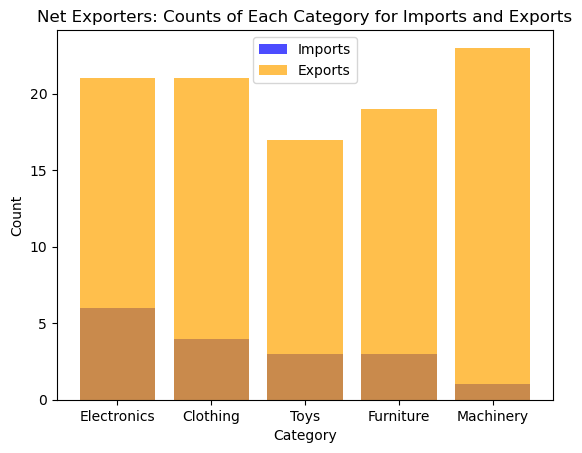

In [1026]:
fig, ax = plt.subplots()

# Plot imports
ax.bar(exporters_category_counts_for_imports.index, exporters_category_counts_for_imports.values, label='Imports', alpha=0.7, color='blue')

# Plot exports
ax.bar(exporters_category_counts_for_exports.index, exporters_category_counts_for_exports.values, label='Exports', alpha=0.7, color='orange')

# Customize the plot
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Net Exporters: Counts of Each Category for Imports and Exports')
ax.legend()

# Show the plot
plt.show()

In [1027]:
net_exporter_df

,Transaction_ID,Country,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms,DayofWeek,Export
133,4578bab3-26a9-4465-a371-ea2c0247145f,Mexico,Import,9933,8527.14,2021-11-14,Electronics,New Michael,543138,2852.28,Air,Lowe PLC,Jean Davenport,53475910,Net 60,Sunday,False
199,dd620222-d9ef-428b-bbcb-50b3961d8dcf,Northern Mariana Islands,Export,8838,1201.24,2023-03-25,Electronics,Port Susan,273778,633.20,Air,Yang Inc,Courtney Petersen,62368997,Net 60,Saturday,True
233,0a3c2c6f-ef2d-4a38-a6e4-b8df0b6d9611,Chad,Export,3744,6503.16,2020-02-29,Furniture,Port John,193548,3896.27,Sea,Ramos and Sons,Cynthia Henry,81766975,Net 30,Saturday,True
283,1cb66f67-46e7-45ad-9bce-35d8cbe88a3f,Mozambique,Export,7737,6956.88,2021-05-21,Machinery,Christopherchester,984970,1944.97,Air,"Ward, Green and Molina",Donna Thompson,98564350,Net 30,Friday,True
503,d48457df-f325-4f2d-8759-5b016c835975,Russian Federation,Import,3149,2418.84,2019-09-22,Electronics,Michaelmouth,978013,4208.03,Air,Palmer Ltd,Christopher Reyes,47272215,Cash on Delivery,Sunday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14286,aab9ef02-60e5-4295-abc3-c72f31a393a7,Namibia,Import,7567,7882.82,2020-10-02,Toys,West James,997198,2597.65,Land,Juarez-Hickman,Joshua Spencer,89818725,Prepaid,Friday,False
14392,19da300c-4109-489d-9e20-84b851f4a99d,Zimbabwe,Export,6427,978.06,2023-11-30,Machinery,Michaelmouth,443266,4928.66,Air,"Aguilar, Johnson and Knight",David Fernandez,91702511,Cash on Delivery,Thursday,True
14407,20837629-e9f8-4fb7-9023-3d333d3fd550,Portugal,Import,5000,1500.24,2023-01-09,Clothing,West Kelly,800344,2707.13,Sea,Jones Inc,Karen Nelson,81082253,Prepaid,Monday,False
14477,080c4ebf-04a3-487c-8e31-e2e811e4bc36,France,Export,6142,8715.10,2020-03-12,Toys,Laurenville,703290,4127.90,Land,Adams-Sweeney,Lisa Guerrero,33905001,Cash on Delivery,Thursday,True


is there a correlation between category and shipping methods for imports and exports between net importers and net exporters 


In [1028]:
importers_shipping_methods_total_value = importers_import_df.groupby('Shipping_Method')['Value'].sum()
importers_shipping_methods_total_value 


Shipping_Method
Air     233762.99
Land    233124.19
Sea     188857.95
Name: Value, dtype: float64

In [1030]:
importers_shipping_methods_by_category_total_value = importers_import_df.groupby(['Category', 'Shipping_Method'])['Value'].sum()
importers_shipping_methods_by_category_total_value


Category     Shipping_Method
Clothing     Air                47621.38
             Land               27202.88
             Sea                26910.48
Electronics  Air                52733.13
             Land               46511.57
             Sea                41970.33
Furniture    Air                78762.20
             Land               32509.94
             Sea                41790.35
Machinery    Air                32781.88
             Land               83116.81
             Sea                37762.82
Toys         Air                21864.40
             Land               43782.99
             Sea                40423.97
Name: Value, dtype: float64

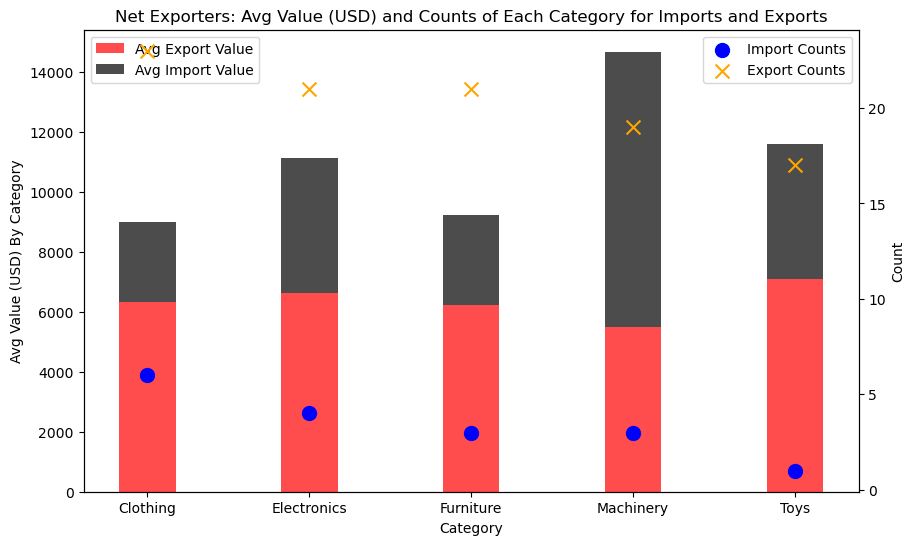

In [1031]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average values as bar charts
width = 0.35  # Width of the bars
categories = avg_value_per_export_category_for_exporters.index

# Plot exports
ax1.bar(categories, avg_value_per_export_category_for_exporters.values, width, label='Avg Export Value', alpha=0.7, color='r')

# Plot imports
ax1.bar(categories, avg_value_per_import_category_for_exporters.values, width, label='Avg Import Value', alpha=0.7, color='black', bottom=avg_value_per_export_category_for_exporters.values)

# Customize the plot
ax1.set_xlabel('Category')
ax1.set_ylabel('Avg Value (USD) By Category')
ax1.set_title('Net Exporters: Avg Value (USD) and Counts of Each Category for Imports and Exports')
ax1.legend(loc='upper left')

# Create a secondary y-axis for counts
ax2 = ax1.twinx()

# Plot counts as scatter plots
ax2.scatter(categories, exporters_category_counts_for_imports.values, label='Import Counts', color='blue', marker='o', s=100)
ax2.scatter(categories, exporters_category_counts_for_exports.values, label='Export Counts', color='orange', marker='x', s=100)

# Customize the secondary y-axis
ax2.set_ylabel('Count')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

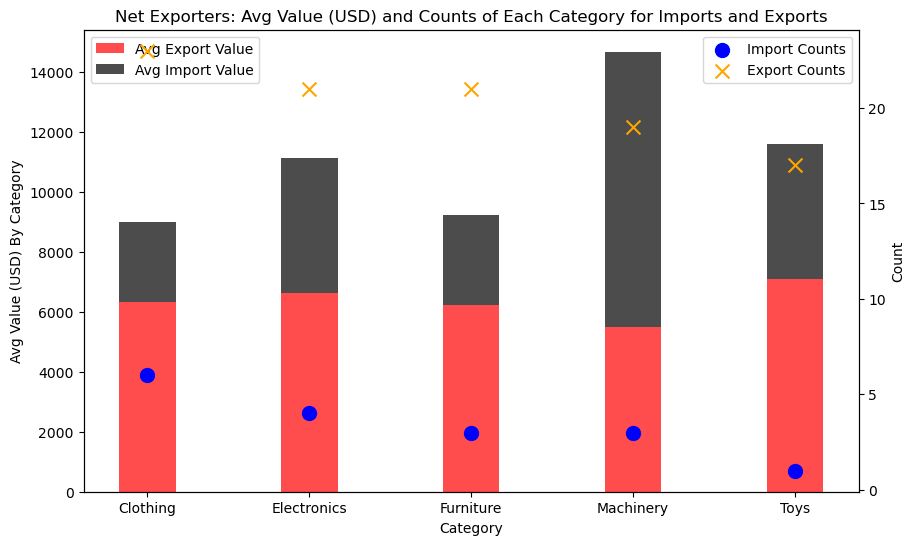

In [1032]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average values as bar charts
width = 0.35  # Width of the bars
categories = avg_value_per_import_category_for_exporters.index

# Plot exports
ax1.bar(categories, avg_value_per_export_category_for_exporters.values, width, label='Avg Export Value', alpha=0.7, color='r')

# Plot imports
ax1.bar(categories, avg_value_per_import_category_for_exporters.values, width, label='Avg Import Value', alpha=0.7, color='black', bottom=avg_value_per_export_category_for_exporters.values)

# Customize the plot
ax1.set_xlabel('Category')
ax1.set_ylabel('Avg Value (USD) By Category')
ax1.set_title('Net Exporters: Avg Value (USD) and Counts of Each Category for Imports and Exports')
ax1.legend(loc='upper left')

# Create a secondary y-axis for counts
ax2 = ax1.twinx()

# Plot counts as scatter plots
ax2.scatter(categories, exporters_category_counts_for_imports.values, label='Import Counts', color='blue', marker='o', s=100)
ax2.scatter(categories, exporters_category_counts_for_exports.values, label='Export Counts', color='orange', marker='x', s=100)

# Customize the secondary y-axis
ax2.set_ylabel('Count')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

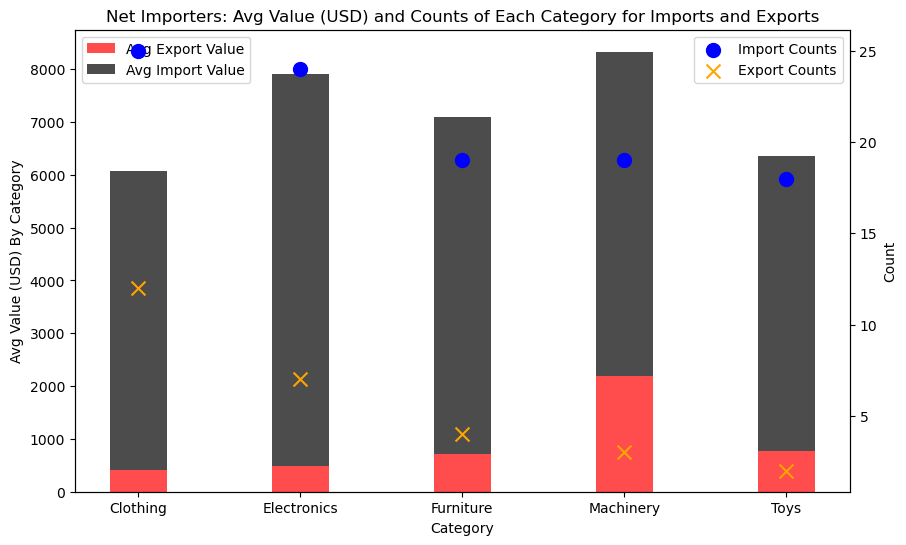

In [1034]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average values as bar charts
width = 0.35  # Width of the bars
categories = avg_value_per_import_category_for_importers.index

# Plot exports
ax1.bar(categories, avg_value_per_export_category_for_importers.values, width, label='Avg Export Value', alpha=0.7, color='r')

# Plot imports
ax1.bar(categories, avg_value_per_import_category_for_importers.values, width, label='Avg Import Value', alpha=0.7, color='black', bottom=avg_value_per_export_category_for_importers.values)

# Customize the plot
ax1.set_xlabel('Category')
ax1.set_ylabel('Avg Value (USD) By Category')
ax1.set_title('Net Importers: Avg Value (USD) and Counts of Each Category for Imports and Exports')
ax1.legend(loc='upper left')

# Create a secondary y-axis for counts
ax2 = ax1.twinx()

# Plot counts as scatter plots
ax2.scatter(categories, importers_category_counts_for_imports.values, label='Import Counts', color='blue', marker='o', s=100)
ax2.scatter(categories, importers_category_counts_for_exports.values, label='Export Counts', color='orange', marker='x', s=100)

# Customize the secondary y-axis
ax2.set_ylabel('Count')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

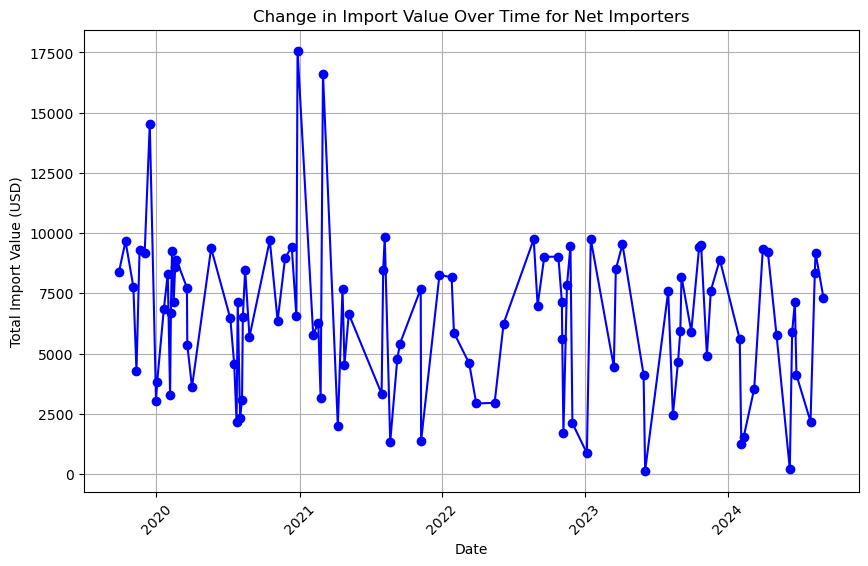

In [1037]:
net_importer_df = net_importer_df[(net_importer_df['Port'].isin(net_importers_list)) & (net_importer_df['Import_Export'] == 'Import')]

# Group by date and calculate the sum of the values for each date
value_over_time = net_importer_df.groupby('Date')['Value'].sum()

# Plot the time series data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(value_over_time.index, value_over_time.values, marker='o', linestyle='-', color='b')

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Total Import Value (USD)')
ax.set_title('Change in Import Value Over Time for Net Importers')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

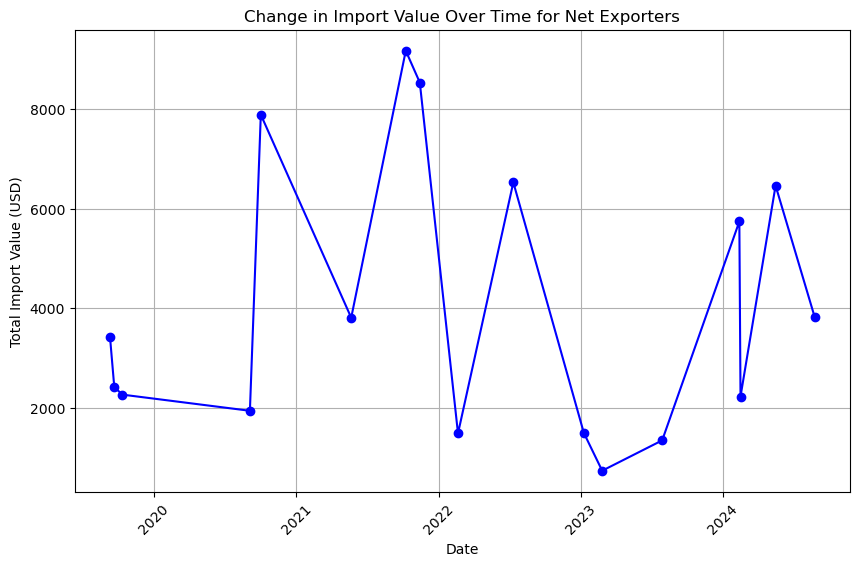

In [1038]:
net_exporter_df = net_exporter_df[(net_exporter_df['Port'].isin(net_exporters_list)) & (net_exporter_df['Import_Export'] == 'Import')]

# Group by date and calculate the sum of the values for each date
value_over_time2 = net_exporter_df.groupby('Date')['Value'].sum()

# Plot the time series data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(value_over_time2.index, value_over_time2.values, marker='o', linestyle='-', color='b')

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Total Import Value (USD)')
ax.set_title('Change in Import Value Over Time for Net Exporters')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()